## Golden Section

In [438]:
# maxima
def function(x):
    
    return 2*np.sin(x) -x**2/10

def golden_section(xl,xu):
    
    gr = ((np.sqrt(5)-1)/2)
    np.set_printoptions(precision=2)# will not work. The function works in numpy array
    
    fl = function(xl)
    fu = function(xu)
    
    d = gr*(xu-xl)  
    
    x1 = xl + d
    x2 = xu - d
    
    fx1 = function(x1)
    fx2 = function(x2)
    
    tol = 1e-4
    err = np.inf
    
    noi = 0
    while err > tol:
        
        noi = noi + 1
        if fx1 > fx2:  
            xl = x2
            fl = fx2
            
            x2 = x1
            fx2 = fx1
            
            d = gr*(xu-xl)
            
            xopt = x1
            x1 = xl + d
            fx1 = function(x1)
            
        elif fx1 < fx2:
            xu = x1
            fu = fx1
            
            x1 = x2
            fx1 = fx2
            
            d = gr*(xu-xl)
            
            xopt = x2
            x2 = xu - d
            fx2 = function(x2)
            
        else:
            xl = (x1+x2)/2
            xu = xl
            xopt = xl
        
        if xopt != 0:
            err = (1-gr)*abs(xu-xl)/xopt

    print(xopt)

In [439]:
golden_section(0,4)

1.4275274955836244


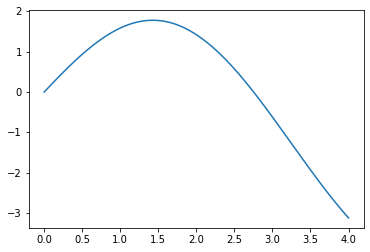

In [433]:
x = np.linspace (0,4,200)
y = function(x)

plt.plot(x,y)

## Parabolic Interpolation

from lagrange interpolating polymonials

$f(x) = \frac{x-x_{1}}{x_{0}-x_{1}}\frac{x-x_{2}}{x_{0}-x_{2}}f(x_{0})+\frac{x-x_{0}}{x_{1}-x_{0}}\frac{x-x_{2}}{x_{1}-x_{2}}f(x_{1})+\frac{x-x_{0}}{x_{2}-x_{0}}\frac{x-x_{1}}{x_{2}-x_{1}}f(x_{2})$

$f'(x) = -\frac{f(x_{0})}{(x_{0}-x_{1})(x_{2}-x_{0})}(2x-x_{1}-x_{2})-\frac{f(x_{1})}{(x_{0}-x_{1})(x_{1}-x_{2})}(2x-x_{0}-x_{2})-\frac{f(x_{2})}{(x_{2}-x_{0})(x_{1}-x_{2})}(2x-x_{0}-x_{1})=0$

$f(x_{0})(2x-x_{1}-x_{2})(x_{1}-x_{2})+f(x_{1})(2x-x_{0}-x_{2})(x_{2}-x_{0})+f(x_{2})(2x-x_{0}-x_{1})(x_{0}-x_{1})=0$

solving for x,

$$x = \frac{f(x_{0})(x_{1}^{2}-x_{2}^{2})+f(x_{1})(x_{2}^{2}-x_{0}^{2})+f(x_{2})(x_{0}^{2}-x_{1}^{2})}{2xf(x_{0})(x_{1}-x_{2})+2xf(x_{1})(x_{2}-x_{0})+2xf(x_{2})(x_{0}-x_{1})}$$

In [494]:
def function(x):
    return 2*np.sin(x) -x**2/10

def par_int(x0,x1,x2):
    
    np.set_printoptions(precision=3)
    i = 0
    while i < 7:
        
        x  = (function(x0)*(x1**2-x2**2)+function(x1)*(x2**2-x0**2)+function(x2)*(x0**2-x1**2))/(2*function(x0)*
                                            (x1-x2)+2*function(x1)*(x2-x0)+2*function(x2)*(x0-x1))
        print('x0 = %f, x1 = %f, x2 = %f, x = %f'%(x0,x1,x2,x))
        if x > x1:
            x0 = x1
            x1 = x
        else:
            x2 = x1
            x1 = x
        
        i = i + 1
    return x1,i

In [498]:
maxx,i = par_int(0,1,4)
maxx
i

x0 = 0.000000, x1 = 1.000000, x2 = 4.000000, x = 1.505535
x0 = 1.000000, x1 = 1.505535, x2 = 4.000000, x = 1.490253
x0 = 1.000000, x1 = 1.490253, x2 = 1.505535, x = 1.425636
x0 = 1.000000, x1 = 1.425636, x2 = 1.490253, x = 1.426602
x0 = 1.425636, x1 = 1.426602, x2 = 1.490253, x = 1.427548
x0 = 1.426602, x1 = 1.427548, x2 = 1.490253, x = 1.427551
x0 = 1.427548, x1 = 1.427551, x2 = 1.490253, x = 1.427552


### Pairwise Distinct 

$(x_{0},y_{0}),(x_{1},y_{1}),(x_{2},y_{2})$ are pairwise distinct

$(x_{0},y_{0}),(x_{0},y_{1}),(x_{2},y_{2})$ are not pairwise distinct

### Newton Interpolating Polynomial

Given a set of K+1 data points

$(x_{0},y_{0}),(x_{1},y_{1}),.......,(x_{j},y_{j}),.........,(x_{n-1},y_{n-1}),(x_{n},y_{n})$

Newton's Interpolating Polynomial is a linear combination of newton basis polynomials.

$$P(x) = \sum_{j=0}^{k}a_{j}p_{j}(x)$$

newton basis polynomials defined as

$$p_{k}(x) = \prod_{i=0}^{k-1}(x-x_{i})\quad\quad 0< k \leq m, \quad \text{for k=0}\quad p_{0}(x) = 1$$

$p_{0}(x) = 1$

$p_{1}(x) = \prod_{i=0}^{0}(x-x_{i}) = x - x_{0}$

$p_{2}(x) = \prod_{i=0}^{1}(x-x_{i}) = (x - x_{0})(x - x_{1})$

$...................................$

$p_{m}(x) = \prod_{i=0}^{m}(x-x_{i}) = (x - x_{0})(x - x_{1})(x - x_{2})..........(x - x_{m-1})$


Let, $P(x) \in \mathcal{P}_{m}$ be a degree m polynomial with 

$$P(x) = a_{0}p_{0} + a_{1}p_{1} + a_{2}p_{2} + .................+ a_{m}p_{m}$$

Assuming, $P(x) = 0$. Then it is a constant zero function.

$P(x_{0}) = P(x_{1}) = P(x_{2}) = ...... = P(x_{m-1}) = P(x_{m}) = 0$

Now we will show step by step that all co-efficients $a_{0},a_{1},a_{2},......,a_{m}$ are all equal to zero

### $P(x_{0}) = 0 = a_{0}p_{0}(x_{0}) + a_{1}p_{1}(x_{0}) + a_{2}p_{2}(x_{0}) + .................+ a_{m}p_{m}(x_{0})$

By defintion, $$p_{0}(x_{0}) = 1$$

$$p_{1}(x_{0}) = p_{2}(x_{0}) = p_{3}(x_{0}) = ...... = p_{m}(x_{0}) = 0$$


So, 

$$P(x_{0}) = a_{0}p_{0}(x_{0}) + a_{1}p_{1}(x_{0}) + a_{2}p_{2}(x_{0}) + ............... + a_{m-1}p_{m-1}(x_{0}) + a_{m}p_{m}(x_{0}) = a_{0}p_{0}(x_{0}) = 0$$

$$\therefore a_{0} = 0$$


### $P(x_{1}) = 0 = a_{0}p_{0}(x_{1}) + a_{1}p_{1}(x_{1}) + a_{2}p_{2}(x_{1}) + .................+ a_{m}p_{m}(x_{1})$

By definition,

$$p_{0}(x_{1}) = 1, p_{1}(x_{1}) = x_{1} - x_{0}$$

$$p_{2}(x_{1}) = (x_{1} - x_{0})(x_{1} - x_{1}) = 0, p_{3}(x_{3}) = (x_{1} - x_{0})(x_{1} - x_{1})(x_{1} - x_{2})$$

$$...............$$

$$p_{m}(x_{1}) = (x_{1} - x_{0})(x_{1} - x_{1})(x_{1} - x_{2})......(x_{1}-x_{m-1}) = 0$$

So, 

$$P(x_{1}) = a_{0}p_{0}(x_{1}) + a_{1}p_{1}(x_{1}) + a_{2}p_{2}(x_{1}) + .................+ a_{m}p_{m}(x_{1}) = a_{0}p_{0}(x_{1}) + a_{1}p_{1}(x_{1}) = 0$$

$$\therefore a_{1} = 0$$


#### similarly $a_{2},a_{3},a_{4},........,a_{m} = 0$

So, linear combination of newton basis polynomial will be zero only if all the co-efficients are zero.

$\therefore$ Newton basis polynomials are linearly independent.

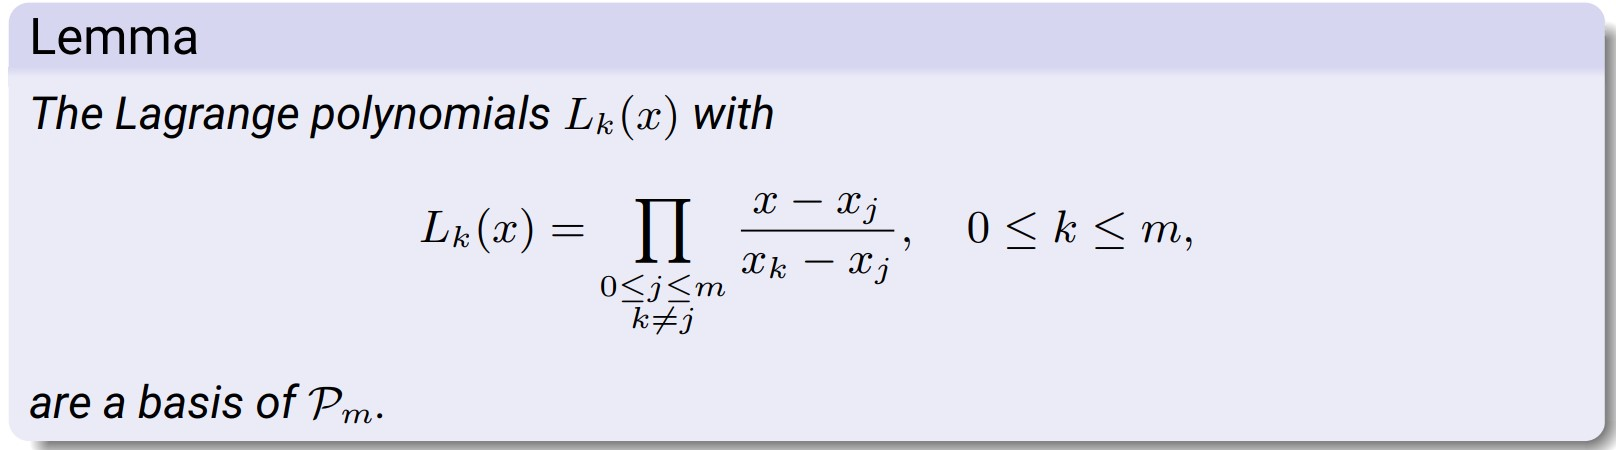

Let, $p(x) \in \mathcal{P}_{m}$ be a degree m polynomial with

$$P(x) = a_{0}L_{0}(x) + a_{1}L_{1}(x) + a_{2}L_{2}(x) + ............... + a_{m}L_{m}(x)$$

Assume that $P(x) = 0$. Then obviously  

$$P(x_{0}) = P(x_{1}) = ........... = P(x_{m}) = 0$$

For any $0 \leq k \leq m$, we have

$0 = P(x_{k}) = a_{0}L_{0}(x_{k}) + a_{1}L_{1}(x_{k}) + a_{2}L_{2}(x_{k}) + ............... + a_{m}L_{m}(x_{k})$

Definition of Lagrange Interpolating Polynomial,

$$P_{m}(x) = \sum_{i = 0}^{m}L_{i}(x)f(x_{i}), \quad \text{where}$$

$$L_{i}(x) = \prod_{j = 0, j \neq i}^{m}\frac{x-x_{j}}{x_{i}-x_{j}}$$



$\Large{L_{0}(x_{k}) = \frac{(x_{k}-x_{1})(x_{k}-x_{2})(x_{k}-x_{3})(x_{k}-x_{4}).........(x_{k}-x_{m})}{(x_{0}-x_{1})(x_{0}-x_{2})(x_{0}-x_{3})(x_{0}-x_{4})...........(x_{0}-x_{m})}} = 1, \text{ for k = 0 or} = 0 \text{, for other k}$

$\Large{L_{1}(x_{k}) = \frac{(x_{k}-x_{0})(x_{k}-x_{2})(x_{k}-x_{3})(x_{k}-x_{4}).........(x_{k}-x_{m})}{(x_{1}-x_{0})(x_{1}-x_{2})(x_{1}-x_{3})(x_{1}-x_{4})...........(x_{1}-x_{m})}} = 1, \text{ for k = 1 or} = 0 \text{, for other k}$

$\Large{L_{2}(x_{k}) = \frac{(x_{k}-x_{0})(x_{k}-x_{2})(x_{k}-x_{3})(x_{k}-x_{4}).........(x_{k}-x_{m})}{(x_{2}-x_{0})(x_{2}-x_{1})(x_{2}-x_{3})(x_{2}-x_{4})...........(x_{2}-x_{m})}} = 1, \text{ for k = 2 or} = 0 \text{, for other k}$

$......................................................................................................................$

$\Large{L_{m}(x_{k}) = \frac{(x_{k}-x_{0})(x_{k}-x_{2})(x_{k}-x_{3})(x_{k}-x_{4}).........(x_{k}-x_{m})}{(x_{m}-x_{0})(x_{m}-x_{1})(x_{m}-x_{3})(x_{m}-x_{4})...........(x_{m}-x_{m-1})}} = 1, \text{ for k = m or} = 0 \text{, for other k}$


$$P(x_{k}) = a_{k}L_{k}(x_{k}) = a_{k}$$

So, $a_{0},a_{1},a_{2},........,a_{m} = 0$ Thus Lagrange polynomials are linearly independent.

Suppose we have nodal points $x_0, x_1,.......,x_m \in R$, not necessarily pairwise distinct.

Having nodal points with duplicates corresponds to the case of interpolation that takes into account higher order derivatives. That is called Hermite interpolation

### Hermite Interpolation

Hermite interpolation is an algorithm which generates interpolating polynomials that interpolate values at the nodes as well as certain derivatives

We seek a polynomial f(x) such that,

$$P(x_{r}) = y_{r}\quad\quad 0\leq r \leq n \quad \therefore (n+1) \text{ eq}^n$$

and 

$$P^{(k_j)}(x_{r}) = y^{(k_j)}_{r},\quad 0\leq r,j \leq n \quad \therefore (k_{0}+k_{1}+k_{2}+......+k_{n}) \text{ eq}^n$$

so $P(x)$ will be a polymonial of degree $m = (n+1)+k_{0}+k_{1}+k_{2}+......+k_{n}-1 = n + k_{0}+k_{1}+k_{2}+......+k_{n}$

let $(x_{0},y_{0}),(x_{1},y_{1}),(x_{2},y_{2}),................,(x_{n},y_{n})$ be pairwise nodal point and $P(x_{r}) = y_{r}, \quad r = 0,1,2,3,.,n$

also $$P^{'}(x_{0}) = y^{'}(x_{0}), \quad P^{''}(x_{0}) = y^{''}(x_{0}), \quad P^{'''}(x_{0}) = y^{'''}(x_{0}), \quad, ........,\quad P^{k_{0}}(x_{0}) = y^{k_{0}}(x_{0})$$

$$P^{'}(x_{1}) = y^{'}(x_{1}), \quad P^{''}(x_{1}) = y^{''}(x_{1}), \quad P^{'''}(x_{1}) = y^{'''}(x_{1}), \quad, ........,\quad P^{k_{1}}(x_{1}) = y^{k_{1}}(x_{1})$$

$$P^{'}(x_{2}) = y^{'}(x_{2}), \quad P^{''}(x_{2}) = y^{''}(x_{2}), \quad P^{'''}(x_{2}) = y^{'''}(x_{2}), \quad, ........,\quad P^{k_{2}}(x_{2}) = y^{k_{2}}(x_{2})$$

$$.....................................................................................$$

$$P^{'}(x_{n}) = y^{'}(x_{n}), \quad P^{''}(x_{n}) = y^{''}(x_{n}), \quad P^{'''}(x_{n}) = y^{'''}(x_{n}), \quad, ........,\quad P^{k_{n}}(x_{n}) = y^{k_{n}}(x_{n})$$

Here $k_{0},k_{1},k_{2},......,k_{n} \geq 0$

if m=n, it becomes simple interpolation, and one can apply newton's divided difference or lagrange system

if m > n , we can use a modified version of newton's divided difference algorithm

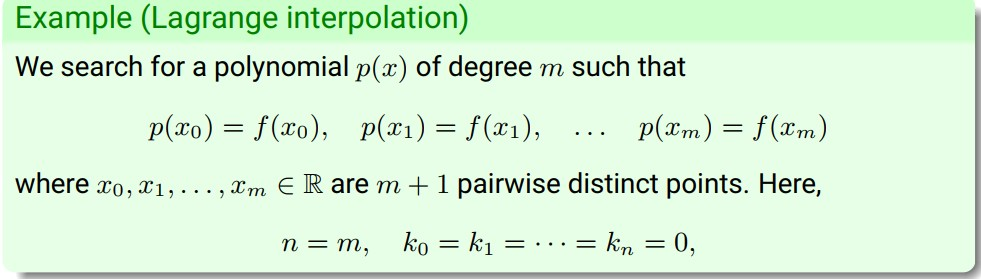

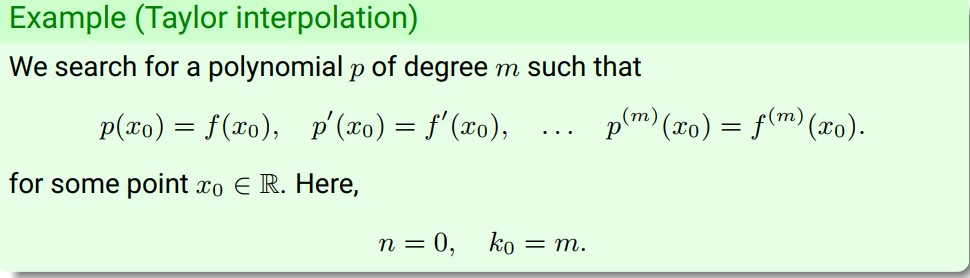

One initiates the algorithm by filling the first column with $x_{k}$, where each $x_{k}$ is repeated m+1 times. We can label them with new indices and call the entries $\bar{x_{i}}$, with $0\leq i \leq (n+1)(m+1)$.

In the second column we fill in the corresponding function values $f(\bar{x_{i}})$. Each value of $y_{k}$ will be repeated m+1 times

Then we follow the same algorithm to compute these divided difference. In the next m columns, we encounter terms with repeated nodes such as $f[x_{k},y_{k}],f[x_{k},y_{k},x_{k}]$,...., where we use extended definitions.

This generates a triangular shape of data, say a lower triangle. Denote the diagonal elements bu $a_{i}$, where $0\leq i\leq(n+1)(m+1).$ This general polynomial is assembled in a same eway as with Newton's divided differences , allowing repeated nodes in $\bar{x_{k}}.$

We use short hand form of notation

$$[f]_{k} = f[\bar{x_{k}}], [f^{'}]_{k} = f[\bar{x}_{k-1},\bar{x}_{k}],................,[f^{m}]_{k} = f[\bar{x}_{k-m},\bar{x}_{k}]$$

for some cases where $f[x_{i},x_{i}] = \frac{f(x_{i})-f(x_{i})}{x_{i}-x_{i}} = \frac{0}{0}$

We would extend the definition 

$$f[x_{i},x_{i}]=f^{'}(x_{i}), \quad f[x_{i},x_{i},x_{i}]=\frac{f^{''}(x_{i})}{2!}, \quad f[x_{i},x_{i},x_{i},x_{i}]=\frac{f^{'''}(x_{i})}{3!}$$

which will be given in problem defination

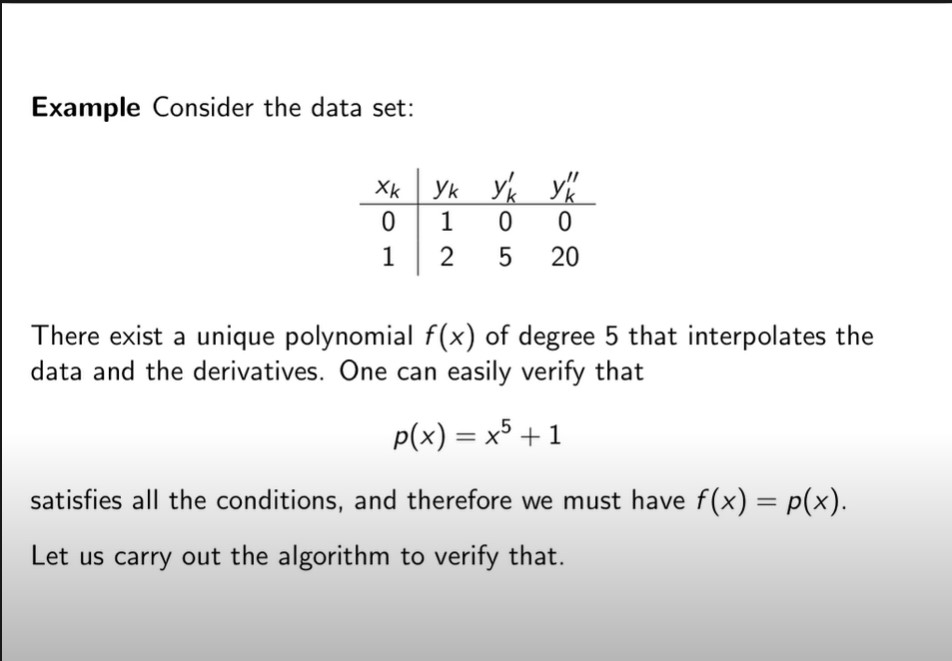

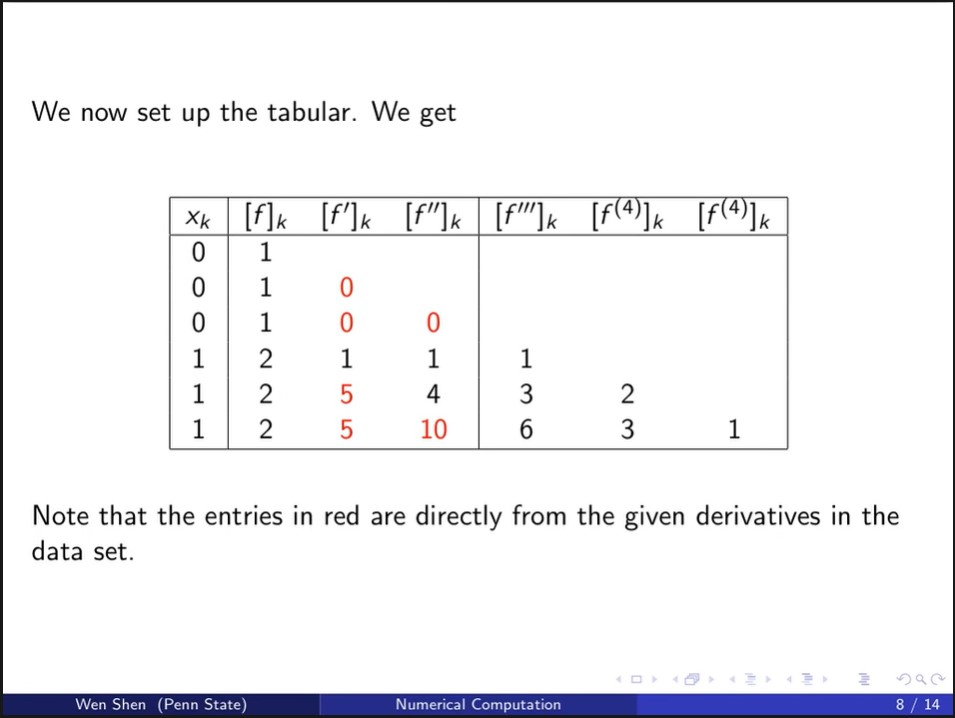

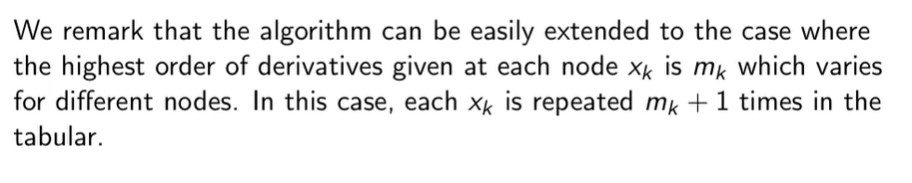

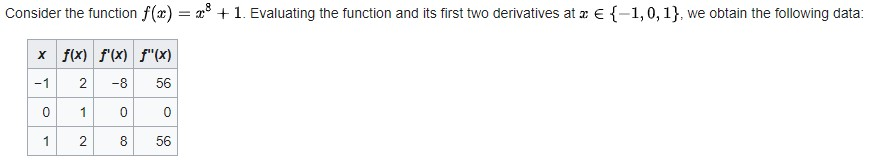

In [194]:
# Library to use
import numpy as np

def match(table,l,r):
    
    result = True
    first = table[l,0]

    for num in table[l+1:r+1,0]:
        if first != num:
            result = False
            break;
            
    return result


def divided_difference(table,d,m,n,pl,pr): 
    
    numerator = (table[pr,1]-table[pl,1])
    denominator = (table[pr,0]-table[pl,0])
    check = match(table,pl,pr)
#     print(check,n,m,pl,pr)
#     print(data)
    if check == True:
        return d[(int) (pr/(n+1)),m]/np.math.factorial(pr-pl)
    else:
        if pr-pl == 1:
            return numerator/denominator
        else:
            return (divided_difference(table,d,m-1,n,pl+1,pr)-divided_difference(table,d,m-1,n,pl,pr-1))/(table[pr,0]-table[pl,0])
        

def hermite_interp(data,x): 
    r,c = np.shape(data)

    n = r
    p = c - 2

    table = np.zeros(shape=(n*(p+1),n*(p+1)+1))

    k = 0
    for i in range(0,n*(p+1)):
        for j in range(0,2):
            table[i,j] = data[k,j]
        if i%(p+1) == p and i != 0: 
            k = k + 1

    for i in range(0,n*(p+1)):
        for j in range(2+i,n*(p+1)):
            table[i,j] = 0
    print(table)
#     print(data)
    for i in range(2,n*(p+1)+1):
        for j in range(i-1,n*(p+1)):
            table[j,i] = divided_difference(table,data,i,p,j-i+1,j)
#             print(j,i,table[j,i])
#         print('\n')
        
    print(table)
    a = np.diagonal(table[:,1:])
    print(a)

In [195]:
# dataset
d1 = np.array([[-1,2,-8,56],
                 [0,1,0,0],
                 [1,2,8,56]]) 

hermite_interp(d1,.5) 

[[-1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ -1.   2.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ -1.   2.  -8.   0.   0.   0.   0.   0.   0.   0.]
 [ -1.   2.  -8.  28.   0.   0.   0.   0.   0.   0.]
 [  0.   1.  -1.   7. -21.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   1.  -6.  15.   0.   0.   0.   0.]
 [  0.   1.   0.   0.  -1.   5. -10.   0.   0.   0.]
 [  1.   2.   1.   1.   1.   1.  -2.   4.   0.   0.]
 [  1.   2.   8.   7.   6.   5.   2.   2.  -1.   0.]
 [  1.   2.   8.  28.  21.  15.  10.   4.   1.   1.]]
[  2.  -8.  28. -21.  15. -10.   4.  -1.   1.]


In [196]:
d2 = np.array([[0,1,0,0],
               [1,2,5,20]])

hermite_interp(d2,.2)

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0.]]
[[ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 1.  2.  1.  1.  1.  0.  0.]
 [ 1.  2.  5.  4.  3.  2.  0.]
 [ 1.  2.  5. 10.  6.  3.  1.]]
[1. 0. 0. 1. 2. 1.]


##### $\bullet$ It is also possible to set up specialized hermite interpolation polynomial functions which do not include all functional and/or derivative values at all nodes.

##### $\bullet$ There may be some missing functional or derivative values at certain nodes.

##### $\bullet$ This lowers the degree of the interpolating function.

### Cubic Hermite Interpolation

$\bullet$ We will develop a two data point Hermite interpolation function which passes through the function ans it's first derivative for the interval [0,1]

$$\begin{array}{|c|c|c|c|}
\hline
 \text{ }& x & f & f^{1}\\
\hline
x_{0} & 0 & f_{0} & f_{0}^{1}\\
\hline
x_{1} & 1 & f_{1} & f_{1}^{1}\\
\hline
\end{array}$$

$\bullet$  Therefore p = 1 and N+1 = 2.

$\bullet$  We must impose (1+1)(2) = 4 constraint equations (match function and its derivative at two data points)

$\bullet$ Therefore we require a 3rd degree polynomial.

$$\begin{split}
g(x) &= a_{0} + a_{1}x + a_{2}x^{2} + a_{3}x^{3}\\
g^{1}(x) &= a_{1}x + 2a_{2}x + 3a_{3}x^{2}\\
\end{split}$$

$\bullet$ Application of constraints

$$\begin{array}{ccc}
\begin{split}
g(0) &= f_{0}\\
g(1) &= f_{1}\\
g^{1}(0) &= f_{0}^{1}\\
g^{1}(1) &= f_{1}^{1}\\
\end{split} & \begin{split}
\Rightarrow &\\
\Rightarrow &\\
\Rightarrow &\\
\Rightarrow &\\
\end{split}& \begin{split}
a_{0} &= f_{0}\\
a_{0} + a_{1} + a_{2} + a_{3} &= f_{1}\\
a_{1} &= f_{0}^{1}\\
a_{1} + 2a_{2} + 3a_{3} &= f_{1}^{1}
\end{split}
\end{array}$$

$\bullet$ Constraint equations may be written in matrix form:

$\begin{bmatrix}
1 & 0 & 0 & 0\\
1 & 1 & 1 & 1\\
0 & 1 & 0 & 0\\
0 & 1 & 2 & 3
\end{bmatrix} \begin{bmatrix}
a_{0}\\
a_{1}\\
a_{2}\\
a_{3}\\
\end{bmatrix} = \begin{bmatrix}
f_{0}\\
f_{1}\\
f_{0}^{1}\\
f_{1}^{1}\\
\end{bmatrix} $

$\bullet$ Solve for $a_{0},a_{1},a_{2},a_{3}$

$$\begin{split}
a_{0} &= f_{0}\\
a_{1} &= f_{0}^{1}\\
a_{2} &= 3f_{1} – 3f_{0} – f_{1}^{1} – 2f_{0}^{1}\\
a_{3} &= -2f_{1} + 2f_{0} + f_{1}^{1} + f_{0}^{1}
\end{split}$$

$\bullet$ Therefore

$$g(x) = f_{0} + f_{0}^{1}x + (3f_{1} – 3f_{0} – f_{1}^{1} – 2f_{0}^{1})x^{2} + (-2f_{1} + 2f_{0} + f_{1}^{1} + f_{0}^{1})x^{3}$$

$\bullet$ We note that g(x) can be re-written such that the functional and derivative values are factored out:

$$g(x)= f_{0}(2x^{3} – 3x^{2} +  1) + f_{1}(2x^{3} + 3x^{2}) + f_{0}^{1}(x^{3} – 2x^{2} + x) + f_{1}^{1}(x^{3}-x^{2})$$

$\bullet$ g(x) can be expressed in generic form as:

$$g(x) = f_{0}\alpha_{0}(x) + f_{1}\alpha_{1}(x) + f_{0}^{1}\beta_{0}(x) + f_{1}^{1}\beta_{0}(x)$$

$\bullet$ Each basis function is a third degree polynomial:

$\begin{split}
\alpha_{0}(x) &= 2x^{3} – 3x^{2} +  1 \text{ associated with the function at data point} x_{0}\\
\alpha_{1}(x) &= 2x^{3} + 3x^{2} \text{ associated with the function at data point} x_{1}\\
\beta_{0}(x) &= x^{3} – 2x^{2} + x \text{ associated with the function at data point} x_{0}\\
\beta_{1}(x) &= x^{3}-x^{2} \text{ associated with the function at data point} x_{1}\\
\end{split}$

$\bullet$ The cubic Hermite basis functions vary with x as:

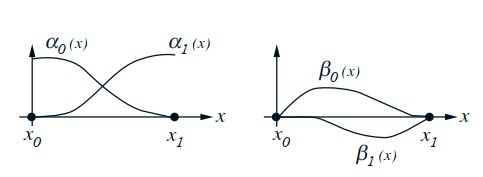

$\bullet$ Therefore we can define 2 separate functions associated with each data point. Each is a third degree polynomial

$\bullet$ NOW WE NEED 2 NODES $\times$ 2 FUNCTIONS PER NODE $\times$ 4 DEGREES OF FREEDOM PER FUNCTION = 16 CONSTRAINTS

$\bullet$ Each of these functions satisfies the following constraints

8 constraints on the functions themselves for to match the specified functional values

$$g(x) = f_{0}\alpha_{0}(x) + f_{1}\alpha_{1}(x) + f_{0}^{1}\beta_{0}(x) + f_{1}^{1}\beta_{0}(x)$$

$$\begin{array}{|c|c|c|c|c|}
\hline
x & \alpha_{0}(x) & \alpha_{1}(x) & \beta_{0}(x_{0}) & \beta_{1}(x_{1})\\
\hline
x_{0} = 0 & 1 & 0 & 0 & 0\\
\hline
x_{1} = 1 & 0 & 1 & 0 & 0\\
\hline
\end{array}$$

8 constraints on the derivatives of the functions for to match the specified derivative values

$$g(x)^{1} = f_{0}\alpha_{0}^{1}(x) + f_{1}\alpha_{1}^{1}(x) + f_{0}^{1}\beta_{0}^{1}(x) + f_{1}^{1}\beta_{0}^{1}(x)$$

$$\begin{array}{|c|c|c|c|c|}
\hline
x & \alpha_{0}^{1}(x) & \alpha_{1}^{1}(x) & \beta_{0}^{1}(x_{0}) & \beta_{1}^{1}(x_{1})\\
\hline
x_{0} = 0 & 0 & 0 & 1 & 0\\
\hline
x_{1} = 1 & 0 & 0 & 0 & 1\\
\hline
\end{array}$$

$\bullet$  Mathematically these 16 constraints can be expressed as

$$\begin{array}{ccc}
\alpha_{i}(x_{j}) =  \delta_{ij}  & \beta_{i}(x_{j}) =  0 &  i,j = 0,1\\
\alpha_{i}^{1}(x_{j}) =  0  & \beta_{i}^{1}(x_{j}) = \delta_{ij} &  i,j = 0,1\\
\end{array}$$

$$\delta_{ij} = \begin{cases}
        1 & i \neq j\\
        0 & i = j
    \end{cases} \text{ Kronecker-Delta}$$

$\bullet$ Therefore an alternative method for setting up is to associate a basis function with each functional value and the various derivative values at each data point

    1) Each of these basis functions is a polynomial of degree (p+1)(N+1)-1.
    2) There will be (p+1)(N+1) basis functions.
    3) We must set up $[(p+1)(N+1)]^{2}$ constraints


## Lagrange Polynomials

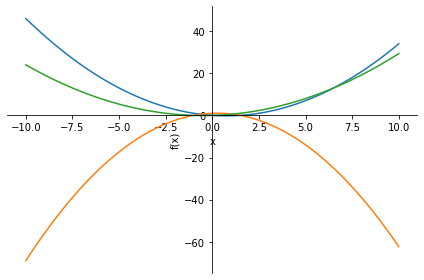

In [4]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

x = sm.symbols('x')

xp=[-1,0,1.5]
yp=[7,6,8.25]

y1 = (x-xp[1])*(x-xp[2])/((xp[0]-xp[1])*(xp[0]-xp[2]))
y2 = (x-xp[0])*(x-xp[2])/((xp[1]-xp[0])*(xp[1]-xp[2]))
y3 = (x-xp[0])*(x-xp[1])/((xp[2]-xp[0])*(xp[2]-xp[1]))

p = sm.plotting.plot(y1,y2,y3,show=False) 
p.show()

$$\mathcal{P}_{n} \text{ means the set of polymonials of degree equal or less than n}$$

## polymonial Interpolation

Given (n+1) points, say $(X_{i},y_P{i})$ where i = 0,1,2,3,......n with distinct $x_{i}$, not necessarily sorted, we want to find a polynomial of degree n.

$$P_{n}(x) = a_{n}x^{n} + a_{n-1}x^{n-1} + a_{n-2}x^{n-2} + a_{n-3}x^{n-3} + ............ + a_{1}x^{1} + a_{0}$$ which fits the data set,

$$P_{n}(x_{i}) = y_{i}, i = 0,1,2,3,.......,n$$

### Motivation:

$\bullet \text{ Find the values between the points for discrete data set}$
$\bullet \text{ To appoximate a function by a polynomial}$
$\bullet \text{ It will be easier to do computation such a s derivative,integration etc.}$

$$P_{n}(x_{i}) = y_{i}, i = 0,1,2,3,.......,n$$

We have (n+1) equations and (n+1) unknowns:

$\begin{align}
P_{n}(x_{0}) = y_{0} &: x_{0}^{n}a_{n} + x_{0}^{n-1}a_{n-1} + ....... + x_{0}a_{1} + a_{0} = y_{0}\\
P_{n}(x_{1}) = y_{1} &: x_{1}^{n}a_{n} + x_{1}^{n-1}a_{n-1} + ....... + x_{1}a_{1} + a_{0} = y_{1}\\
P_{n}(x_{2}) = y_{2} &: x_{2}^{n}a_{n} + x_{2}^{n-1}a_{n-1} + ....... + x_{2}a_{1} + a_{0} = y_{2}\\
........=..&:..........................................&\\
P_{n}(x_{n}) = y_{n} &: x_{n}^{n}a_{n} + x_{n}^{n-1}a_{n-1} + ....... + x_{n}a_{1} + a_{0} = y_{n}\\
\end{align}$

Putting the equation in matrix form

$$\textbf{X}\overrightarrow{a} = \overrightarrow{y}$$

$\textbf{X}$ is an (n+1),(n+1) matrix called van der monde matrix

Theorem: If $x_{i}$'s are distinct, $\textbf{X}$ is invertible, therefore $\overrightarrow{a}$ has unique solution

Can be solved by any linear equation solving method. If $\textbf{X}_{n}$ has very large condition number for large n. therefore not effective to solve if n is large

### ILL Conditioning

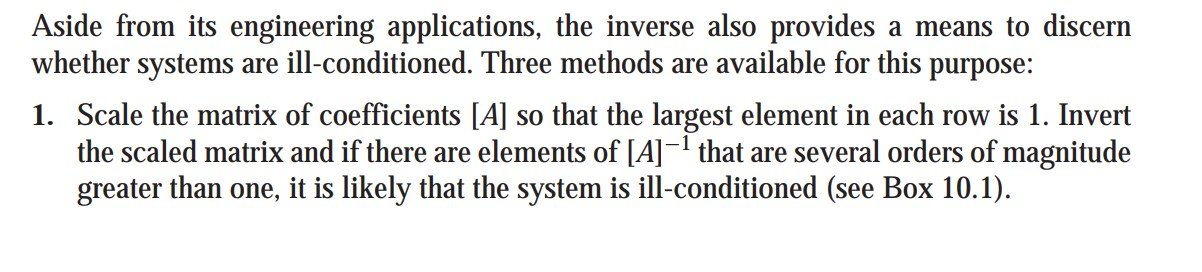

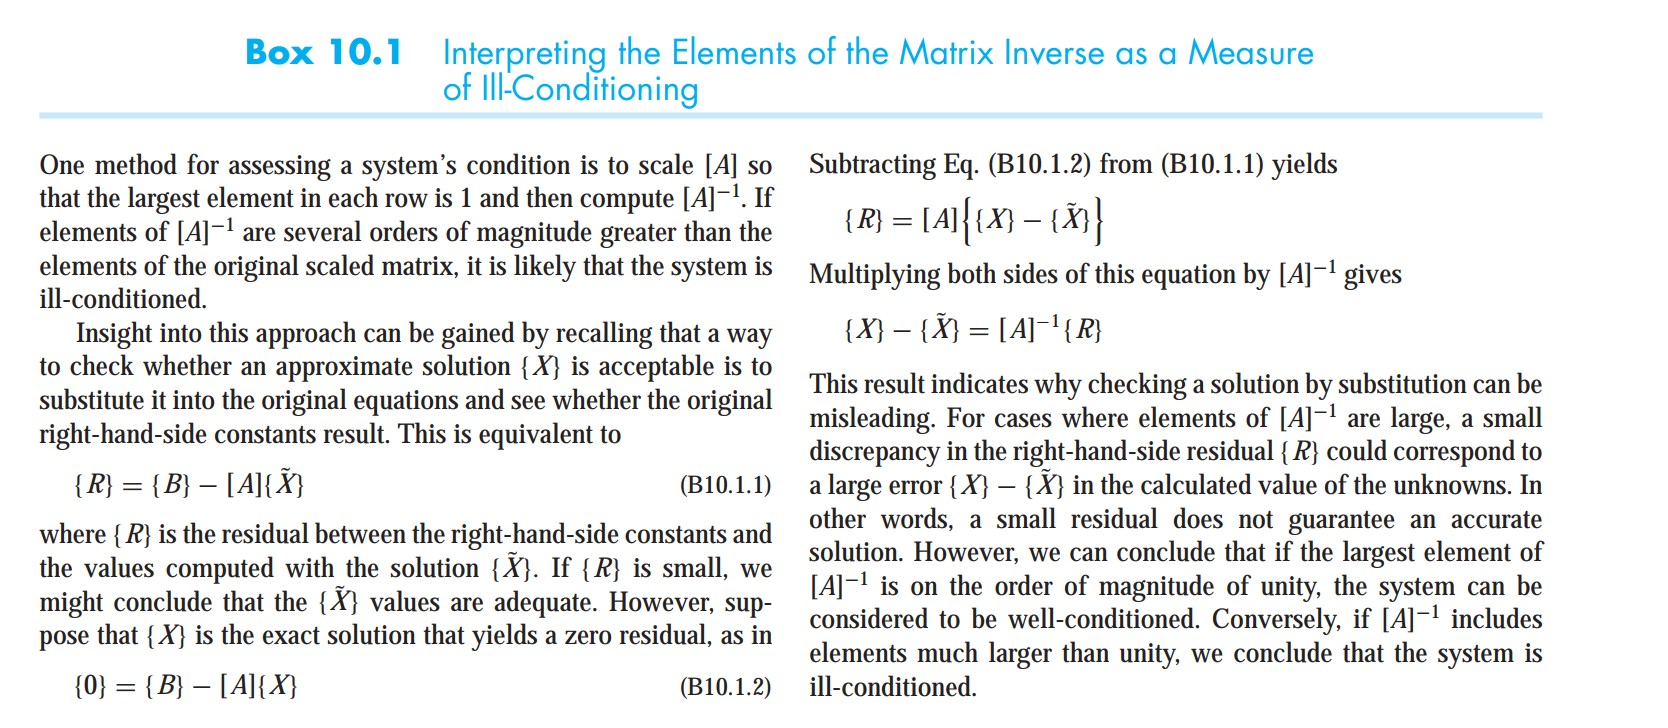

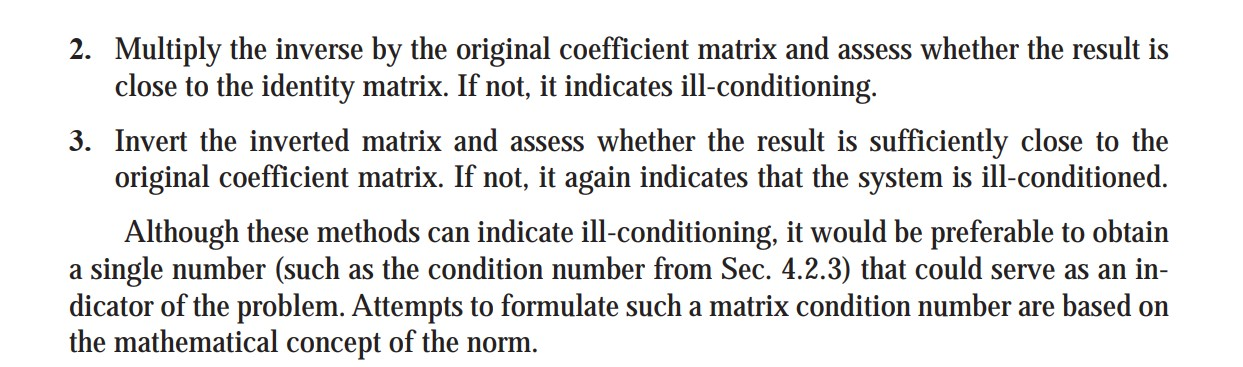

#### Other Efficient Method

1. Newton's Interpolating Polymonial
2. Lagrange Polynomial

Given points: $x_{0},x_{1},......,x_{n}$

Define cardinal functions $l_{0},l_{1},....,l_{n}:\in \mathcal{P}^{n}$,satisfying the properties 

$$l_{i}(x_{j}) = \delta_{ij} = \begin{cases} 
      1 &, i=j \\
      0 &, i\neq j \\
   \end{cases}$$
   
Here, $\delta_{ij}$ is called the Kronecker's Delta 

The cardinal functions $l_{i}(x)$ can be written as 

$
\begin{align}
l_{i}(x) &= \prod_{j=0,j\neq i}^{n}\Big(\frac{x-x_{j}}{x_{i}-x_{j}}\Big)\\
         &= \frac{x-x_{0}}{x_{i}-x_{0}}...\frac{x-x_{1}}{x_{i}-x_{1}} ........\frac{x-x_{i-1}}{x_{i}-x_{i-1}}.\frac{x-x_{i+1}}{x_{i}-x_{i+1}}...\frac{x-x_{n}}{x_{i}-x_{n}} \\
\end{align}
$



Lagrange form of interpolating polynomials can be expressed as 

$$P_{n}(x) = \sum_{i=0}^{n}l_{i}(x)\cdot y_{i}$$

pros and cons

(+) Elegant formula

(-) Slow to compute, each $l_{i}(x)$ is different

(-) adding new data requires to recompute all $l_{i}$ all over again

The general case for $a_{n}:$

Assume that $P_{n-1}(x)$ interpolates $(X_{i},y_{i})$ for i = 0,1,2,...n-1

Let
$$P_{n}(x) = P_{n-1}(x) + a_{n}(x-x_{0})(x-x_{1})(x-x_{2})......(x-x_{n-1})$$

Then for i = 0,1,2,...n-1, we have

$$P_{n}(x)=P_{n-1}(x)=y_{i}$$

$P_{n}(x_{n}) = y_{n}$ 

$$y_{n} = P_{n-1}(x_{n}) + a_{n}(x_{n}-x_{0})(x_{n}-x_{1})(x_{n}-x_{2}).....(x_{n}-x_{n-1})$$

then

$$a_{n} = \frac{y_{n}-P_{n-1}(x_{n})}{(x_{n}-x_{0})(x_{n}-x_{1})(x_{n}-x_{2}).....(x_{n}-x_{n-1})}$$

Newton's form of interpolating polynomial

$$P_{n}(x) = a_{0} + a_{1}(x-x_{0}) + a_{2}(x-x_{0})(x-x_{1}) + a_{3}(x-x_{0})(x-x_{1})(x-x_{2}) + a_{n}(x_{n}-x_{0})(x_{n}-x_{1})(x_{n}-x_{2}).....(x_{n}-x_{n-1})$$

### Fundamental Theorem of Algebra

Every polynomial of degree n that is not identically zero, has maximum n roots(including multiplicities). These roots may be real or complex. In particular, this implies that if a polynomial of degree n has more than n roots, then the polynomial is identically zero

### Theorem. (Existence and Uniqueness of Polynomial Interpolation)

Given $(x_{i},y_{i})_{i=0}^{n}$ with $x_{i}$'s distinct. There exists one and only polynomial $P_{n}(x)$ of degree$\leq n$ such that $P_{n}(x_{i}) = y_{i}$ for i = 0,1,2,.....,n

$\textbf{Proof :}$ 
    
$\textbf{Uniqueness :}$ Let's assume , we have two polynomials $p(x),q(x)\in\mathcal{P}_{n}$, such that 

$$p(x_{i}) = y_{i}, q(x_{i}) = y_{i}, i=0,1,2,.....,n$$

Let's construct a new function, 

$$g(x) = p(x) - q(x), \text{a polynomial of degree }\leq n$$

$$\therefore p(x_{i}) - q(x_{i}) = y_{i}-y_{i} = 0, i = 0,1,2,.....,n$$

so $g(x)$ has n+1 zeros. A $n^{th}$ order polynomial can't have n+1 zeros. So we must have $g(x) \equiv 0$

$$\therefore p(x) \equiv q(x)$$

### Error in polynomial Interpolation

Given a function $f(x)$ on $x \in [a,b]$ and a set of distinct points $x_{i}\in[a,b]$, i = 0,1,2,...,n. Let $P_{n}(x) \in \mathcal{P}_{n}$,

$$P_{n}(x_{i}) = f(x_{i}),\quad i = 0,1,2,.,n$$

$\textbf{error function :}$ $e(x) = f(x) - P_{n}(x)$, $\quad\quad x\in [a,b]$ 

Theorem: There exists some value $\xi \in [a,b]$, such that

$$e(x) = \frac{1}{(n+1)!}f^{(n+1)}(\xi)\prod_{i=0}^{n}(x-x_{j}),\quad \text{for all x} \in [a,b]$$

$\textbf{Proof :}$ if $f\in\mathcal{P}_{n}$, then by uniqueness Theorem of polynomial interpolation we must have $f(x)=P_{n}(x)$. Then $e(x) \equiv 0$ and the proof is trivial

Now let's assume $f \not\in\mathcal{P}_{n}$(if we duifferentiate f, n times we will still get non zero, so f is most likely not a polynomial or order of it is larger than n). If $x = x_{i}$ for some i, we have $e(x_{i}) = f(x_{i})-P_{n}(x_{i}) = 0$ and the result holds

if $x \neq x_{i}$ for any i

$$W(x) = \prod_{i=0}^{n}(x-x_{i}) \quad\quad \in\mathcal{P}_{n+1}$$

it holds

$W(x_{i}) = 0,\quad  W(x) = x^{n+1} + \text{some lower powers of x}, W^{n+1} = (n+1)!$

Let's fix y such that $a\leq y\leq b$ and $y \neq x_{i}$; for any i. We define a constant

$$c = \frac{f(y)-P_{n}(y)}{W(y)}$$

and another function 

$$\phi(x) = f(x) - P_{n}(x) - cW(x) = 0$$

We find all the zeros for $\phi(x)$. We see that $x_{i}$'s are zeros since 

$$\phi(x_{i}) = f(x_{i}) - P_{n}(x_{i}) - cW(x_{i}) = 0 = 0,\quad\quad i=0,1,2,....,n$$

$f(x_{i}) - P_{n}(x_{i}) = 0, \quad W(x_{i}) = 0\quad\quad i=0,1,2,....,n$

and also y is zero because 

$$\phi(y) = f(y) - P_{n}(y) - cW(y) = 0$$

So, $\phi$ has at least (n+2) zeros on [a,b].

Our deduction:

$\phi(x)$ has at least (n+2) zeros on [a,b].

$\phi'(x)$ has at least (n+1) zeros on [a,b].

$\phi''(x)$ has at least (n) zeros on [a,b].

$\phi'''(x)$ has at least (n-1) zeros on [a,b].

.......................................

$\phi^{n}(x)$ has at least 2 zeros on [a,b].

$\phi^{n+1}(x)$ has at least 1 zeros on [a,b].

Let's call that zero $\xi$ such that $\phi^{(n+1)}(\xi) = 0$

$$\phi^{(n+1)}(\xi) = f^{(n+1)}(\xi) - 0 - cW^{(n+1)}(\xi) = 0$$

$W^{(n+1)} = (n+1)!$

$$f^{(n+1)}(\xi) - 0 - cW^{(n+1)}(\xi) = 0$$

$$f^{(n+1)}(\xi) = cW^{(n+1)}(\xi) = c(n+1)!$$

$$f^{(n+1)}(\xi) = \frac{f(y)-P_{n}(y)}{W(y)}(n+1)! = \frac{e(y)}{{W(y)}}(n+1)!$$

$$e(y) = \frac{1}{(n+1)!}f^{(n+1)}(\xi)W(y) = \frac{1}{(n+1)!}f^{(n+1)}(\xi)\prod_{i=0}^{n}(x-x_{i}), \text{ for some } \xi \in [a,b].$$

### Norm

Norm is the magnitude of a vector(length of a vector)

$\overrightarrow{(x)} = (x_{1},x_{2},x_{3},...........,x_{n})$

Really advance stuff $\mathcal{L}^{p}$ norm , banac space, topology whole other stuff

### Uniform Grid 

Equally distributing the nodes $x_{i}$ on [a,b], with n+1 nodes. 

$$x_{i} = a + ih, \quad h = \frac{b-a}{n}, \quad i=0,1,2,......,n$$

One can show that for $x \in [a,b]$, it holds

$$\prod_{i=0}^{n}|x-x_{i}| \leq \frac{1}{4}h^{n+1}\cdot n!$$

$\textbf{Proof}:$ if $x = x_{i}$ for some i, then $x-x_{j} = 0$ and the product is 0, so it trivially holds.

Now assume $x_{i} < x < x_{i+1}$ for some i. We have 

$$\max\limits_{x_i< x< x_{i+1}}|(x-x_{i})(x-x_{i+1})| = \frac{1}{4}(x_{i+1}-x_{i})^{2} = \frac{h^2}{4}$$

Now considering the other terms in the product, say $x - x_{j}$, for either $j > i+ 1 $ or $j < i$. Then $|x-x_{j}|\leq h(j-i)$ for $j > i+1$ and $|x-x_{j}|\leq h(i+1-j)$ for $j < i$. In all such cases, the product of these terms are bounded by $h^{n-1}n!$ thus proving the result   

We have the error estimate

$$|e(x)|\leq \frac{1}{4(n+1)}|f^{(n+1)}(x)|h^{n+1}\leq \frac{M_{n+1}}{4(n+1)}h^{n+1}$$

where

$$M_{n+1} = \max\limits_{x \in[a,b]}|f^{(n+1)}(x)| = \big|\big|f^{(n+1)}\big|\big|_{\infty}$$

#### Chebychev nodes

$\textbf{Type I:}$ Including the end points.

For interval[-1,1] : $\bar{x}_{i} = \cos(\frac{i}{n}\pi), \quad\quad i = 0,1,2,...,n$

For interval [a,b] : $\bar{x}_{i}=\frac{1}{2}(a+b)+ \frac{1}{2}(b-a)\cos(\frac{i}{n}\pi), \quad\quad i = 0,1,2,...,n$

$$\max\limits_{a\leq x\leq b}\Big\{\prod_{k=0}^{n}|x-\bar{x_{k}}| = 2^{-n} \leq \max\limits\Big\{\prod_{k=0}^{n}|x-x_{k}|\Big\}$$

 where $x_{k}$ is any other choice of nodes.
 
 Error bound: $\big|e(x)\big| \leq \big|\frac{1}{(n+1)!}(x)\big|2^{-n}$ 

$\textbf{Type II}:$ can be chosen strictly inside the interval [a,b]:

$$\bar{x_{i}} = \frac{1}{2}(a+b)+ \frac{1}{2}(b-a)\cos\Big(\frac{2i+1}{2n+2}\pi\Big), \quad\quad i = 0,1,2,...,n$$

For large n, polynomials are heavy to deal with.

In general, interpolation polynomials do not converge to the function as $n \to \infty$

For small intervals, the error with polynomial interpolation is small.

Better to use piecewise polynomial interpolation.

In [2]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

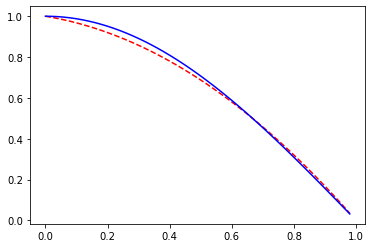

In [5]:
a = np.array([0,1,2/3])
N = 3
A = np.vander(a,N,increasing=True)
b = np.array([1,0,1/2])
x = np.linalg.solve(A,b)

t = np.arange(0,1,.02)
p2 = x[0] + x[1]*t + x[2]*t**2
plt.plot(t,p2,'--r')
plt.plot(t,np.cos(np.pi/2*t),'-b')
plt.show()

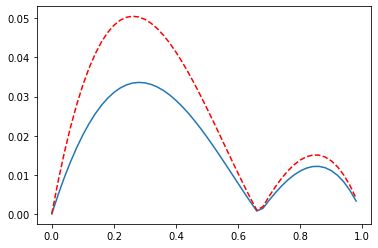

In [6]:
errorbound = abs(np.pi**3/48*t*(t-1)*(t-2/3))
error = np.abs(np.cos(np.pi/2*t)-p2)

plt.plot(t,error,t,errorbound,'--r')
plt.show()

### Disadvantages of polynomial interpolation $P_{n}(x)$

    1. n-time differentiable. We do not need such high smoothness.
    2. big error in certain intervals(near the ends).
    3. no convergence result
    4. Heavy to compute for large n

### Problem Setting 

Given a set of data 

$\begin{array}{c|c|c|c|c}
x & t_{0} & t_{1} & ... & t_{n}\\
\hline
y & y_{0} & y_{1} & ... & y_{n}\\
\end{array}$

Find a function $\mathit{S}(x)$ which interpolates the points $(t_{i},y_{i})^{n}_{i}=0$.

The set $t_{0}<t_{1}<....<t_{n}$ are called knots. They need to be ordered.

$\mathit{S}(x)$ consists of piecewise polynomials

$$\mathit{S}(x)=\begin{cases}
                \mathit{S}_{0}(x), & t_{0} \leq x\leq t_{1}\\
                \mathit{S}_{1}(x), & t_{1} \leq x\leq t_{2}\\ 
                ....., & \\
                \mathit{S}_{n-1}(x), & t_{n-1} \leq x\leq t_{n}\\
                \end{cases}$$
                
                
$\mathit{S}(x)$ is called a splinje a degree k, if

$\begin{array}{cc}
&\bullet  \mathit{S}_{i}(x)\text{ is a polynomial of degree k;}\quad \quad\quad\quad\quad\quad \quad\quad\quad\quad\quad \quad\quad\quad\quad\\
&\bullet  \mathit{S}(x)\text{ is (k-1) times continuously duifferentiable, i.e, for i =1,2,..,k-1 we have}\\
\end{array}$


$$\mathit{S}_{i-1}(t_{i}) = \mathit{S}_{i}(t_{i}),$$

$$\mathit{S}_{i-1}^{'}(t_{i}) = \mathit{S}_{i}^{'}(t_{i}),$$

$$.$$

$$.$$

$$.$$

$$\mathit{S}_{i-1}^{k-1}(t_{i}) = \mathit{S}_{i}^{k-1}(t_{i}),$$

### Natural Cubic Spline

Given $t_{0} < t_{1} <\cdot\cdot\cdot\cdot<t_{n}$, we define the cubic spline with

$$\mathcal{S}(x) = \mathcal{S}_{i}(x) \text{ for } t_{i}\leq x \leq t_{i+1}$$

and 

$$\mathcal{S}_{i}(x) = a_{i}x^{3} + b_{i}x^{2} + c_{i}x + d_{i}, i=0,1,\cdot\cdot\cdot,n-1$$

n data points and each point need 4 values.

A total of 4n equation.

$$\textbf{Requirements:}\mathcal{S},\mathcal{S}^{'},\mathcal{S}^{''} \text{ are all continuous}$$

\begin{array}{cccc}
  & \text{equation} &  & \text{no of equations} \\ 
  (1)& \mathcal{S}_{i}(t_{i})=y_{i} & i=0,1,2,\cdot\cdot\cdot,n-1 & n \\
  (2)& \mathcal{S}_{i}(t_{i+1})=y_{i+1} & i=0,1,2,\cdot\cdot\cdot,n-1 & n \\
   (3)& \mathcal{S}^{'}_{i}(t_{i+1})=\mathcal{S}^{'}_{i+1}(t_{i+1}) & i=0,1,2,\cdot\cdot\cdot,n-2 & n-1 \\ 
   (4)& \mathcal{S}^{''}_{i}(t_{i+1})=\mathcal{S}^{''}_{i+1}(t_{i+1}) & i=0,1,2,\cdot\cdot\cdot,n-2 & n-1 \\
   (5)& S_{0}^{''}(t_{0})=0,S^{''}_{n-1}(t_{n})=0 & & 2
\end{array}

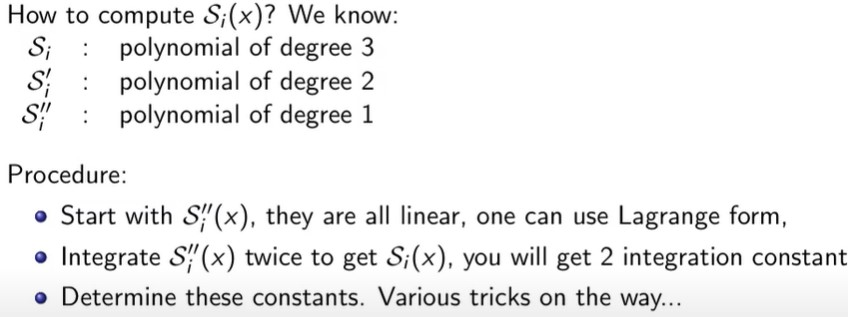

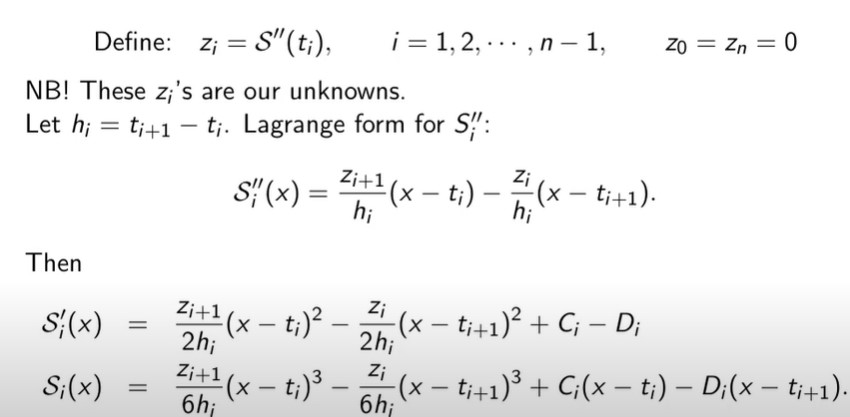

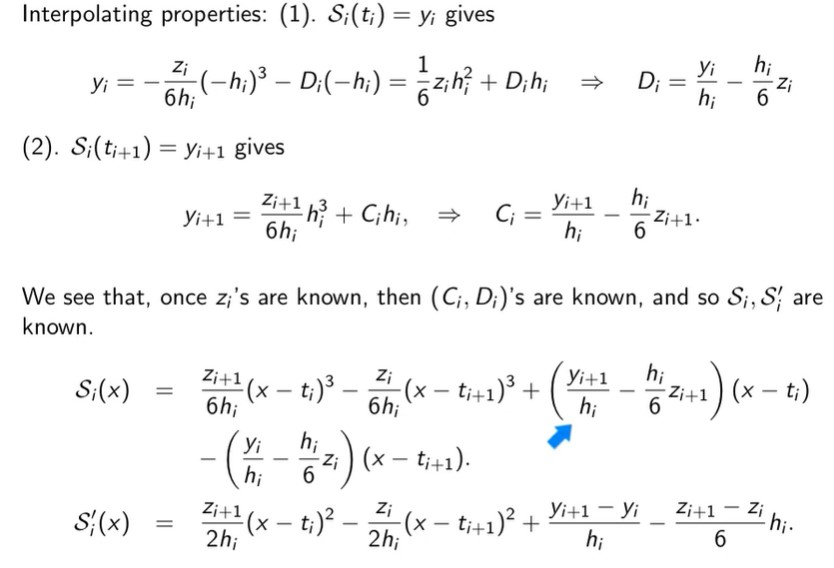

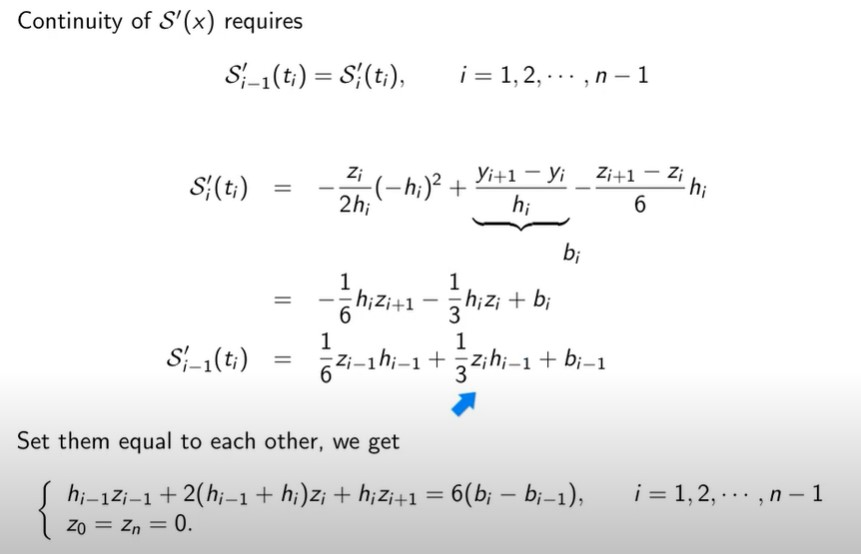

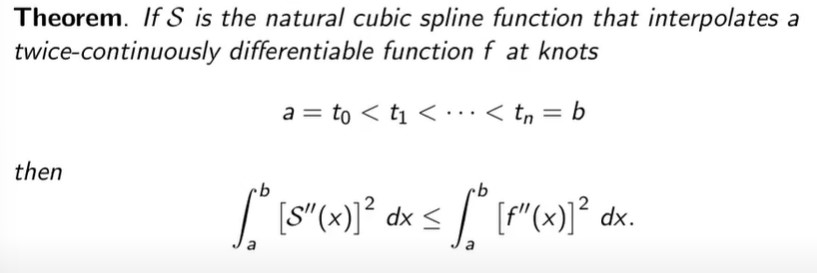

#### Note: 2nd derivative is related to curvature. 1st derivative is the rate of change of the function(slope of the graph of the function) 2nd derivative is the rate of change of 1st derivative(how much does the graph of a function bend). The larger the curvature the more it bends and it will be less smooth. This theorem proves that among all the functions that goes through the knots/goes through the set of points the natural cubic spline has the smallest curvature therefore is the smoothest curvature that goes through the points.  

$\textbf{Proof:}$

Let $g(x) = f(x) - \mathcal{S}(x)$

Then $g(t_{i}) = 0, i = 01,2,\cdot\cdot\cdot,n$

and $f^{''}=\mathcal{S}^{''}+g^{''},\quad\quad (f^{''})^{2}=(\mathcal{S}^{''})^{2}+(g^{''})^{2} + 2\mathcal{S}^{''}g^{''}$

$$\Rightarrow \int_{a}^{b}(f^{''})^{2}\text{d}x = \int_{a}^{b}(\mathcal{S}^{''})^{2}\text{d}x + \int_{a}^{b}(\mathcal{g}^{''})^{2}\text{d}x + \int_{a}^{b}2\mathcal{S}^{''}\mathcal{g}^{''}\text{d}x$$

We claim that $$\int_{a}^{b}\mathcal{S}^{''}\mathcal{g}^{''}\text{d}x = 0$$

and 

$$\int_{a}^{b}(f^{''})^{2}\text{d}x \geq 0, \int_{a}^{b}(\mathcal{S}^{''})^{2}\text{d}x \geq 0, \int_{a}^{b}(\mathcal{g}^{''})^{2}\text{d}x \geq 0$$

this would imply 

$$\int_{a}^{b}(f^{''})^{2}\text{d}x \geq \int_{a}^{b}(\mathcal{S}^{''})^{2}\text{d}x$$

$$\int_{a}^{b}\mathcal{S}^{''}\mathcal{g}^{''}\text{d}x = 0$$

using integration by parts,

$$\int_{a}^{b}\mathcal{S}^{''}\mathcal{g}^{''}\text{d}x = \mathcal{S}^{''}g^{'}\Big\vert_{a}^{b} - \int_{a}^{b}\mathcal{S}^{'''}g^{'}\text{d}x$$

Since $\mathcal{S}^{''}(a) = \mathcal{S}^{''}(b) = 0,\quad \text{so } \mathcal{S}^{''}g^{'}\Big\vert_{a}^{b}=0$

For the second term, $\mathcal{S}^{'''}(x)$ is piecewise constant. Call

$$c_{i} = \mathcal{S}^{''}(x), \text{ for } x\in[t_{i},t_{i+1}].$$

Then, 

$$\int_{a}^{b}\mathcal{S}^{'''}g^{'}\text{d}x = \sum_{i=0}^{n-1}c_{i}\int_{t_{i}}^{t_{i+1}}{g^{'}(x)}\text{d}x = \sum_{i=0}^{n-1}c_{i}[g(t_{i+1}-g(t_{i})]=0$$

In [3]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import sympy as sm
import numpy as np
import scipy as sc
from scipy.sparse import spdiags, csr_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from IPython.display import display, Math
import sys
np.set_printoptions(linewidth=120)

### Cubic Spline Interpolation of $$y = \sin(x)$$

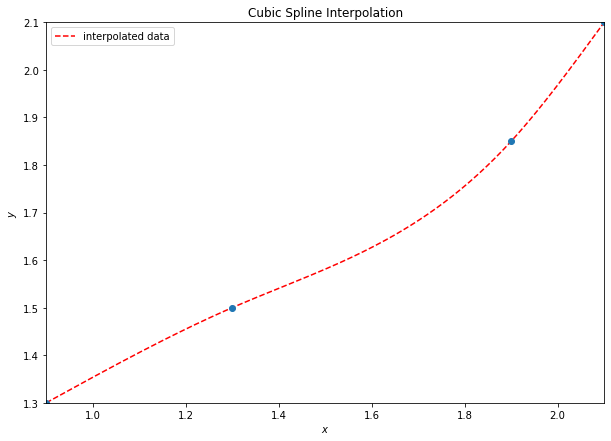

In [224]:
fig,ax = plt.subplots(1,1,figsize=(10,7))

ax.plot(x_interpolated,y_interpolated,'--r',label = 'interpolated data')
ax.plot(xs,ys, 'o')
ax.set_xlim(x_interpolated[0],x_interpolated[-1])
ax.set_ylim(y_interpolated[0],y_interpolated[-1])
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Cubic Spline Interpolation");
ax.legend(loc='upper left')

plt.show()

In [5]:
xs = np.array([0.9,1.3,1.9,2.1])
ys = np.array([1.3,1.5,1.85,2.1])
r = [0,2*np.pi]
n = 200

def id_range(x_specified,x_interpolation,n):
    boo = np.zeros(n)
    
    nr = np.size(x_specified)
    
        
    for i in range(0,nr-1):
        loc = np.where(np.logical_and( x_interpolation >= x_specified[i], x_interpolation < x_specified[i+1]))
        boo[loc] = i
        
    boo[n-1] = nr-2
    return boo
        


def cubic_spline(xs,ys,r,n):
    
    h = np.zeros(np.size(xs)-1)
    b = np.zeros(np.size(xs))
    A = csr_matrix((np.size(xs),np.size(xs)))
    C = np.zeros(np.size(xs)-1)
    D = np.zeros(np.size(xs)-1)
    p = []
    q = []
    r = []
    x = sm.symbols('x')
    S = x*np.zeros(np.size(xs)-1)
    
    for i in range(0,np.size(xs)-1):
        h[i] = xs[i+1] - xs[i]

    for i in range(1,np.size(xs)-1): 
        b[i] = 6*((ys[i+1] - ys[i])/h[i] - (ys[i] - ys[i-1])/h[i-1])  

    
    for i in range(1,np.size(xs)-1):
        p = np.append(p,h[i-1])
        q = np.append(q,2*(h[i-1]+h[i]))
        r = np.append(r,h[i])

    diagA = np.array([p,
                      q,
                      r])
    
    A_elements = spdiags(diagA, (0,-1,-2), np.size(xs), np.size(xs)-2).T
    A[0,0] = 1
    A[1:np.size(xs)-1,0:np.size(xs)] = csr_matrix(A_elements)
    A[np.size(xs)-1,np.size(xs)-1] = 1

    z = spsolve(A, b)
    print(z)
    for i in range(0,np.size(xs)-1):
        D[i] = ys[i]/h[i] - h[i]*z[i]/6
        C[i] = ys[i+1]/h[i] - h[i]*z[i+1]/6
        
     
    for i in range(0,np.size(xs)-1):
        S[i] = z[i+1]/(6*h[i])*(x-xs[i])**3 - z[i]/(6*h[i])*(x-xs[i+1])**3 + C[i]*(x-xs[i]) - D[i]*(x-xs[i+1])

    xi = np.linspace(xs[0], xs[np.size(xs)-1], num = n, endpoint = True)
    yi = np.zeros(n)       
    val = id_range(xs,xi,n)
    
    num = 0
    for i in val: 
        yi[num] = S[int(i)].subs(x,xi[num])
        num = num + 1 
    return xi,yi

x_interpolated,y_interpolated = cubic_spline(xs,ys,r,n)

[ 0.         -0.56338028  2.71126761  0.        ]


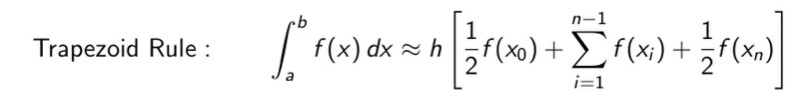

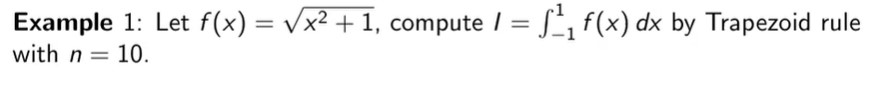

In [254]:
a = -1
b = 1
n = 10
xi = np.linspace(-1, 1, num = n+1, endpoint=True)
f = np.sqrt(xi**2+1)
h = (b-a)/n
I = (h)*(f[0]/2 + np.sum(f[1:-1]) + f[-1]/2) 
I

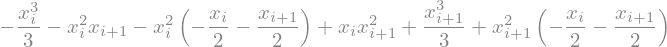

In [263]:
x_i, x_i1 = sm.symbols('x_i x_{i+1}',constant = True)
x = sm.symbols('x')

f = (x-x_i)*(x-x_i1)
sm.integrate(f,(x,x_i,x_i1))

## Error Estimates for Trapezoid Rule

We define the error:
    
$$\large{E_{T}(f;h) = l(f)-T(f;h) = \sum_{i=0}^{n-1}\int_{x_{i}}^{x_{i+1}}\big[f(x) - p_{i}(x)\big]dx = \sum_{i=0}^{n-1}E_{T,i}(f;h)}$$    

Where $E_{T,i}(f;h)$ is the error on each sub-interval

$$\large{E_{T,i}(f;h) = \int_{x_{i}}^{x_{i+1}}\big[f(x) - p_{i}(x)\big]dx},\quad\text{i=0,1,2,........,n-1}$$  

Error bound with with polymonial interpolation:

$$\large{f(x)-p_{i}(x) = \frac{1}{2}f''(\xi_{i})(x-x_{i})(x-x_{i+1})},\quad\quad(x_{i}<\xi_{i}<x_{i+1})$$

Error estimate on each sub-interval:

$$\large{E_{T,i}(f;h) = \frac{1}{2}f''(\xi_{i})\int_{x_{i}}^{x_{i+1}}(x-x_{i})(x-x_{i+1})dx = -\frac{1}{12}h^{3}f''(\xi_{i})}$$

####  $\begin{align}
\int_{x_{i}}^{x_{i+1}}{(x-x_{i})(x-x_{i+1})\text{d}x} &= \int_{x_{i}}^{x_{i+1}}{\big\{x^{2}-x(x_{i}+x_{i+1})+x_{i}x_{i+1}\big\}\text{d}x}\\
                                                      &= \frac{x^{3}}{3}\bigg\vert_{x_{i}}^{x_{i+1}} - \big(x_{i}+x_{i+1}\big)\cdot\frac{x^{2}}{2}\bigg\vert_{x_{i}}^{x_{i+1}} + x_{i}x_{i+1} \cdot x\bigg\vert_{x_{i}}^{x_{i+1}}\\
                                                      &= \frac{x_{i+1}^{3}-x_{i}^{3}}{3} - (x_{i+1}+x_{i})\frac{x_{i+1}^{2}-x_{i}^{2}}{2} + (x_{i+1}-x_{i})x_{i+1}x_{i}\\
                                                      &= (x_{i+1}-x_{i})\Big\{\frac{x_{i+1}^{2}+x_{i+1}x_{i}+x_{i}^{2}}{3}-\frac{(x_{i+1}+x_{i})^{2}}{2} + x_{i+1}x_{i}\Big\}\\
                                                      &= \frac{h_{i}}{6}\Bigg(2(x_{i+1}^{2}+x_{i+1}x_{i}+x_{i}^{2}) - 3(x_{i+1}+x_{i})^{2} + 6x_{i+1}x_{i}\Bigg)\\
                                                      &= \frac{h_{i}}{6}\Bigg(-x_{i+1}^{2} + 2x_{i+1}x_{i} - x_{i}^{2}\Bigg)\\
                                                      &= -\frac{1}{12}h_{i}\bigg(x_{i+1}-x_{i}\bigg)^{2} = -\frac{1}{12}h_{i}^{3}
\end{align}$

The total error is:
    
$$\begin{split}
E_{T}(f;h) &= \sum_{i=0}^{n-1}E_{T,i}(f,h) = \sum_{i=0}^{n-1}-\frac{1}{12}h^{3}f^{''}({\xi_{i}})\\
            &= -\frac{1}{12}\bigg[\sum_{i=0}^{n-1}f^{''}({\xi_{i}})\bigg]\cdot\frac{1}{n}\cdot\frac{b-a}{h}\\
            &= f^{''}(\xi) = n
\end{split}$$    

which gives 

$$E_{T}(f;h) = -\frac{b-a}{12}h^{2}f^{''}(\xi),\quad\quad \xi \in(a,b).$$

Error bound 

$$|E_{T}(f;h)| \leq \frac{b-a}{12}h^{2}\max\limits_{x\in(a,b)}|f^{''}(x)|$$.

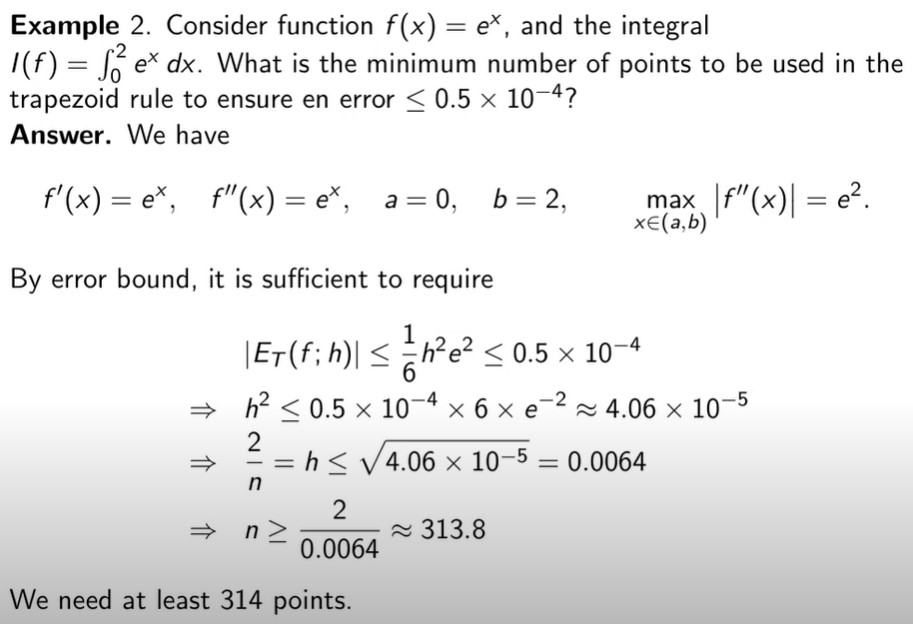

### Simpson's Rule

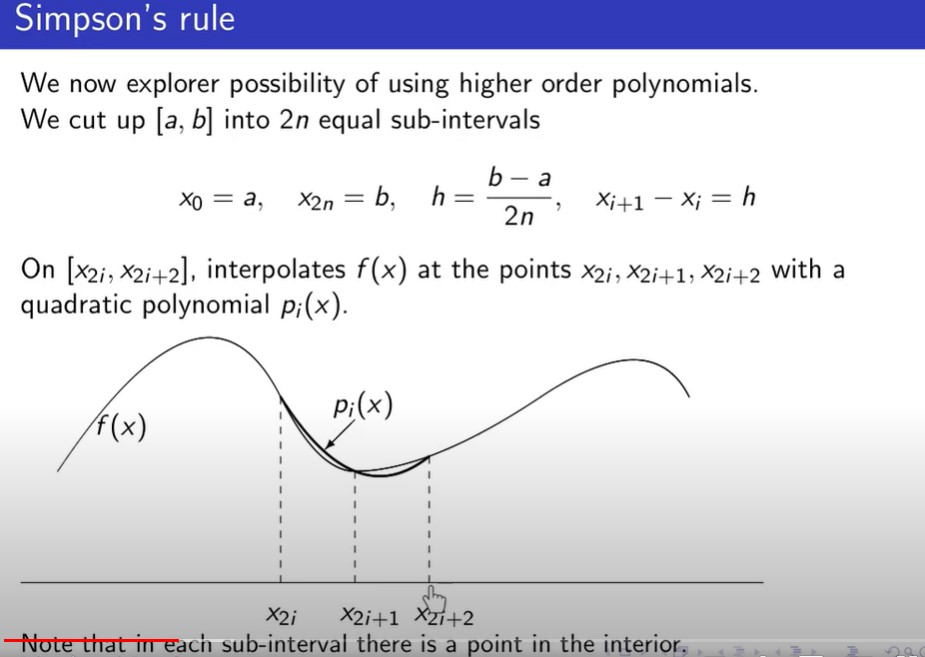

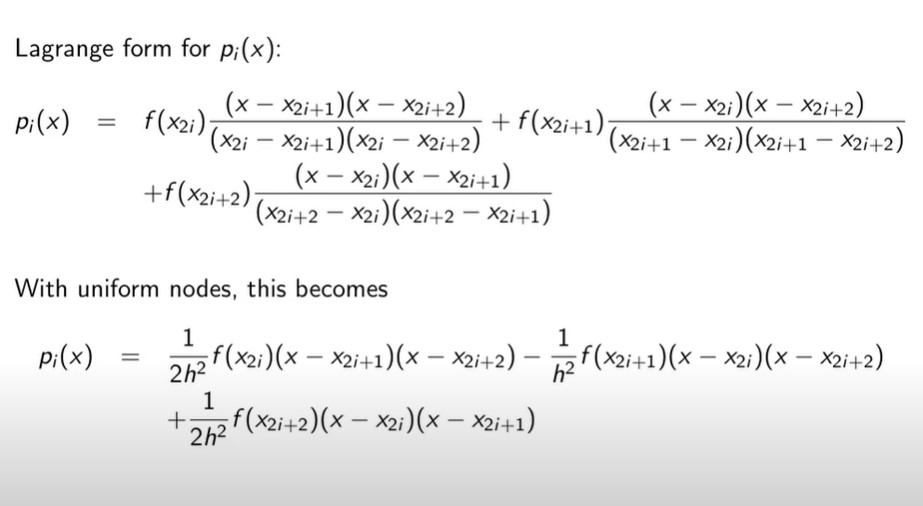

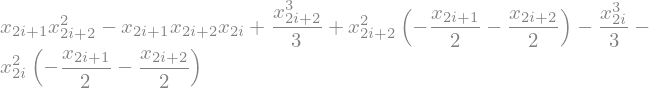

In [264]:
x_2i1, x_2i2, x_2i = sm.symbols('x_{2i+1} x_{2i+2} x_{2i}',constant = True)
x = sm.symbols('x')

f = (x-x_2i1)*(x-x_2i2)
sm.integrate(f,(x,x_2i,x_2i2))

### $\begin{align}
I_{1} &= \int_{x_{2i}}^{x_{2i+2}}{(x-x_{2i+1})(x-x_{2i+2})\text{d}x}\\
      &= \frac{x^{3}}{3}\bigg\vert_{x_{2i}}^{x_{2i+2}} - \big(x_{2i+1}+x_{2i+2}\big)\cdot\frac{x^{2}}{2}\bigg\vert_{x_{2i}}^{x_{2i+2}} + x_{2i+1}x_{2i+2} \cdot x\bigg\vert_{x_{2i}}^{x_{2i+2}}\\
      &= \frac{x_{2i+2}^{3}-x_{2i}^{3}}{3} - (x_{2i+2}+x_{2i+1})\frac{x_{2i+2}^{2}-x_{2i}^{2}}{2} + (x_{2i+2}-x_{2i})x_{2i+1}x_{2i+2}\\
      &= (x_{2i+2}-x_{2i})\Big\{\frac{x_{2i+2}^{2}+x_{2i+2}x_{2i}+x_{2i}^{2}}{3}-\frac{(x_{2i+2}+x_{2i})(x_{2i+2}+x_{2i+1})}{2} + x_{2i+2}x_{2i+1}\Big\}\\
      &= \frac{2h_{i}}{6}\Big\{2\big(x_{2i+2}^{2}+x_{2i+2}x_{2i}+x_{2i}^{2}\big)-3\big(x_{2i+2}^{2}+(x_{2i}+x_{2i+1})x_{2i+2} + x_{2i}x_{2i+1}\big) + 6x_{2i+2}x_{2i+1}\Big\}\\
      &= \frac{2h_{i}}{6}\Big(-x_{2i+2}^{2} + 2x_{2i+2}x_{2i} + 2x_{2i}^{2} - 3x_{2i}x_{2i+2} + 3x_{2i+1}x_{2i+2} - 3x_{2i}x_{2i+1}\Big)\\
      &= \frac{2h_{i}}{6}\Big(-x_{2i+2}^{2} + 2x_{2i+2}x_{2i} - x_{2i}^{2} + 3x_{2i}^{2} - 3x_{2i}x_{2i+1} - 3x_{2i}x_{2i+2} + 3x_{2i+1}x_{2i+2}\Big)\\
      &= \frac{2h_{i}}{6}\Big(-(x_{2i+2}-x_{2i})^{2} + 3x_{2i}(x_{2i}-x_{2i+1}) + 3x_{2i+2}(x_{2i+1}-x_{2i})\Big)\\
      &= \frac{2h_{i}}{6}\big(-(2h_{i})^{2} - 3x_{2i}h_{i} + 3x_{2i+2}h_{i}\Big)\\
      &= \frac{2h_{i}}{6}\big(-4h_{i}^{2} + 3h_{i}\cdot 2h_{i}\big)\\
      &= \frac{2h_{i}}{6}2h_{i}^{2}\\
      &= \frac{2h_{i}^{3}}{3}
\end{align}$  


### $I_{2} = \int_{x_{2i}}^{x_{2i+2}}{-(x-x_{2i})(x-x_{2i+2})\text{d}x} = \frac{4h_{i}^{3}}{3}$

### $I_{3} = \int_{x_{2i}}^{x_{2i+2}}{(x-x_{2i})(x-x_{2i+1})\text{d}x} = \frac{2h_{i}^{3}}{3}$

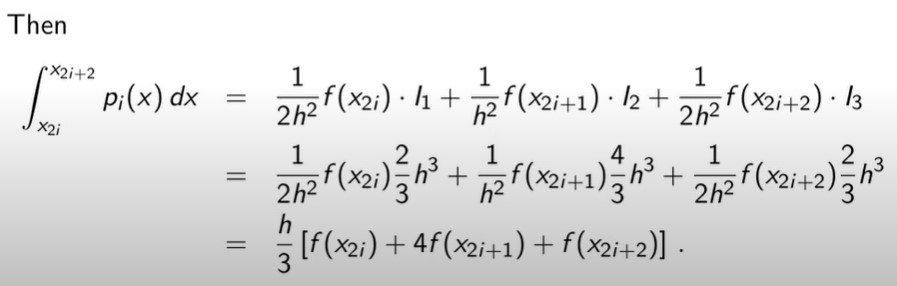

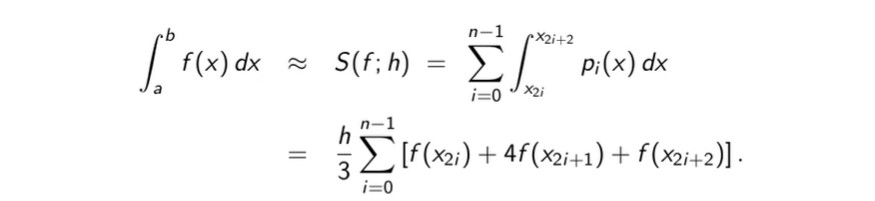

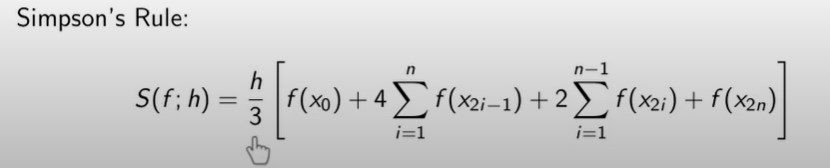

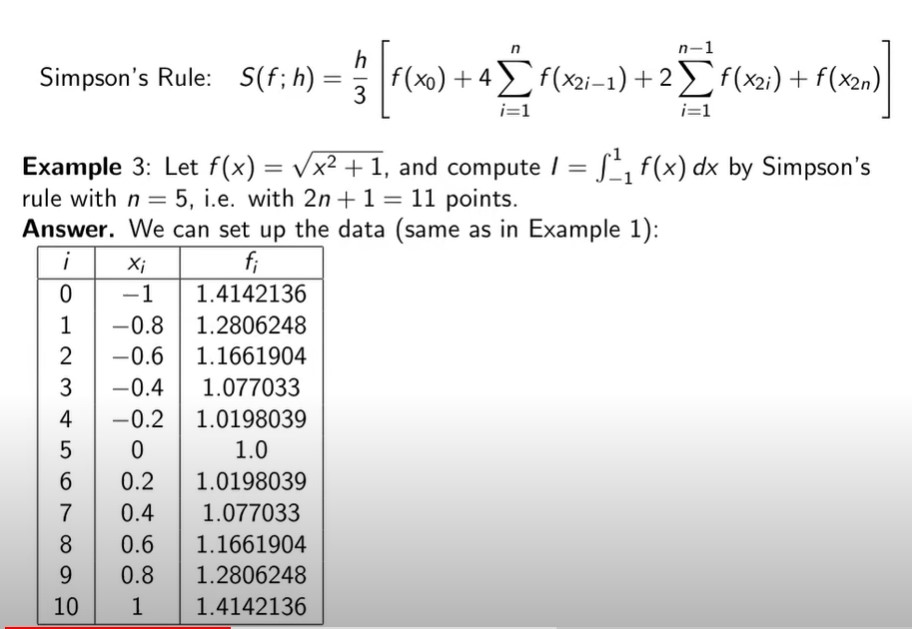

In [286]:
a = -1
b = 1
n = 5
xi = np.linspace(a,b,2*n+1,endpoint=True)
f = np.sqrt(xi**2+1)
h = (b-a)/(2*n)
I = (h/3)*(f[0] + 4*np.sum(f[range(1,2*n+1,2)]) + 2*np.sum(f[range(2,2*n-1,2)]) + f[-1])
I

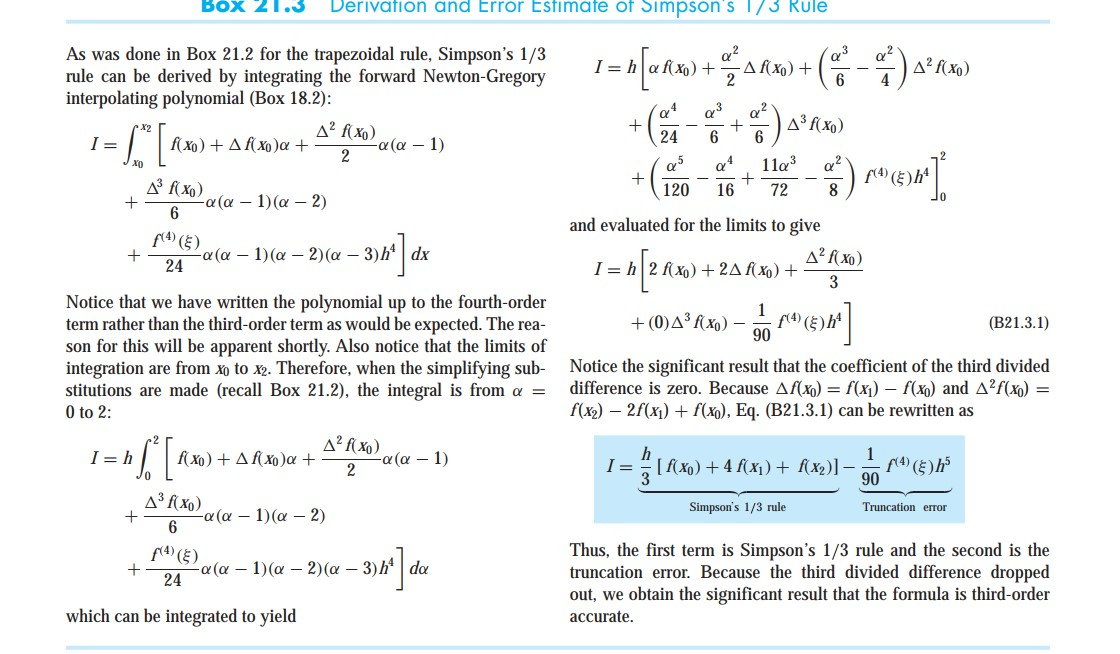

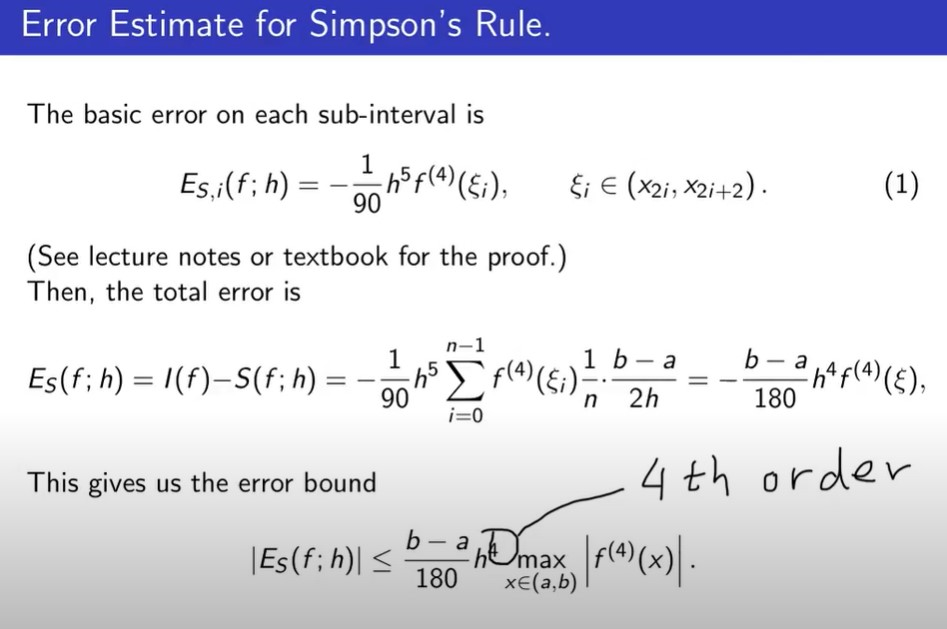

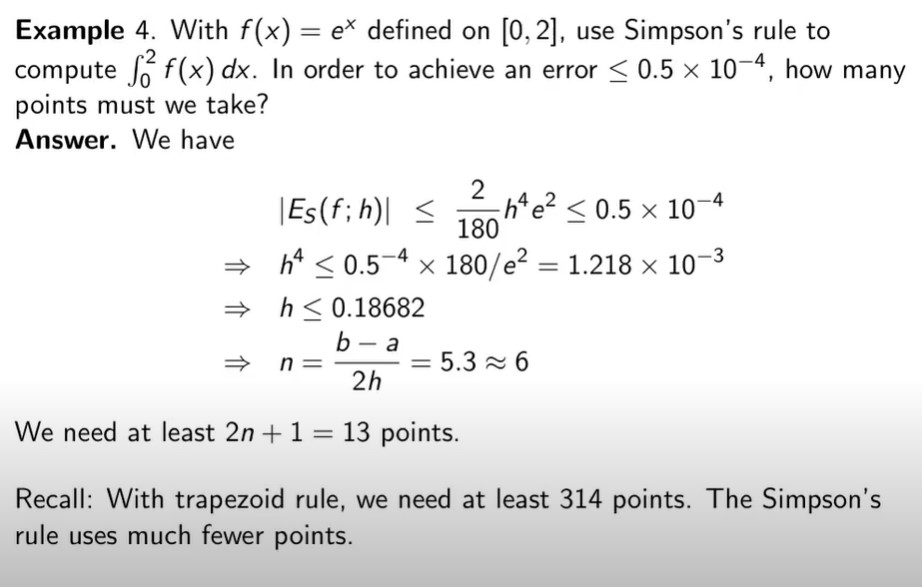

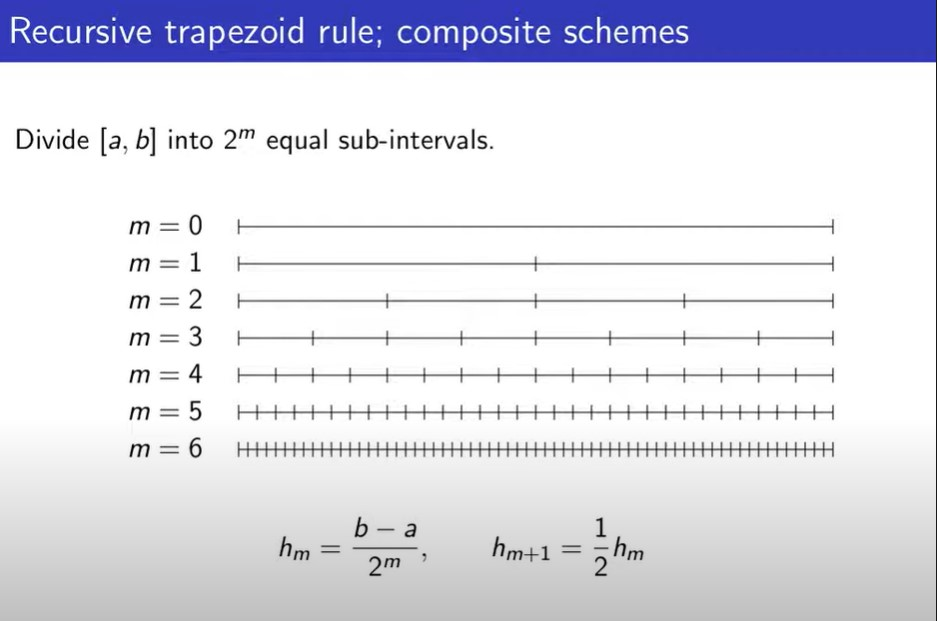

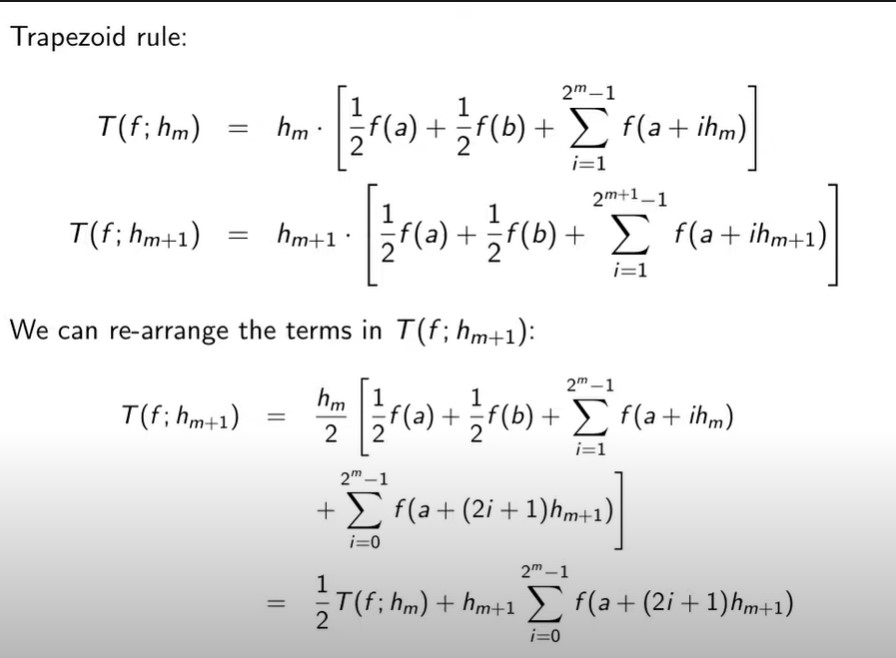

#### Advantages:

1. One can keep the computation for a level n. If this turns out to be not accurate enough, then add one more level to get better appoximation $\Rightarrow$ flexibility.


2. This formula allows us to compute a sequence of apporximations to a define integral using trapezoid rule without re-evaluatingh the integrand at points where it has already been evaluated $\Rightarrow$ efficiency. 


A similar recursive algorithm can be developed using Simpson's rule.

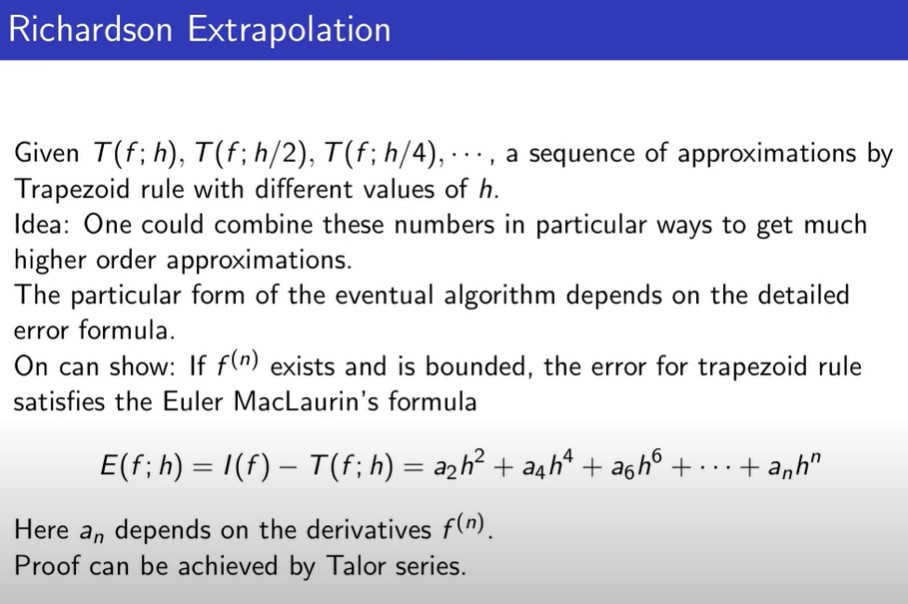

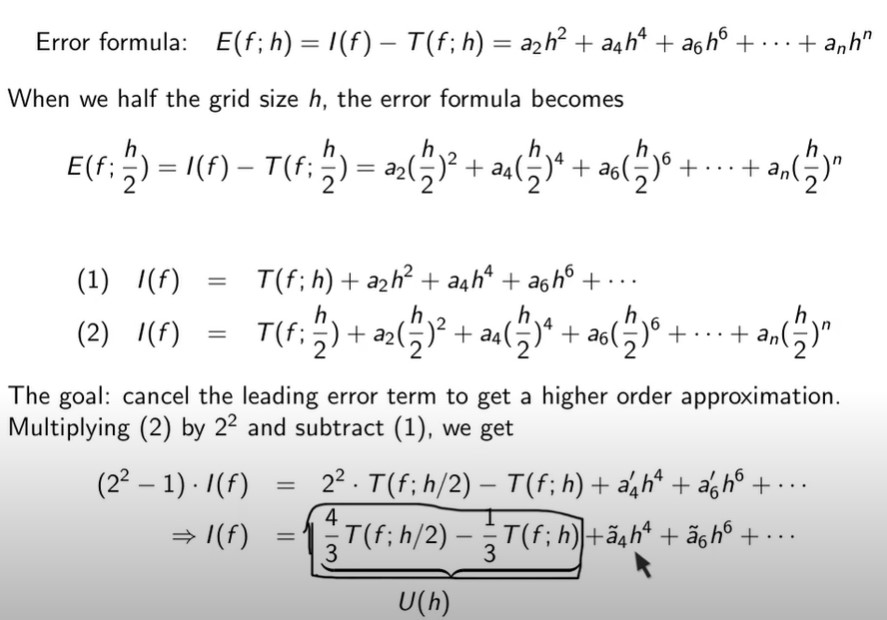

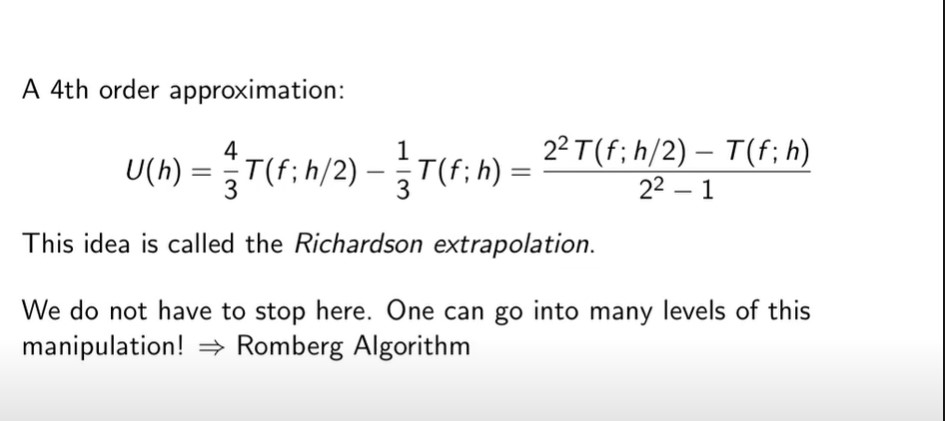

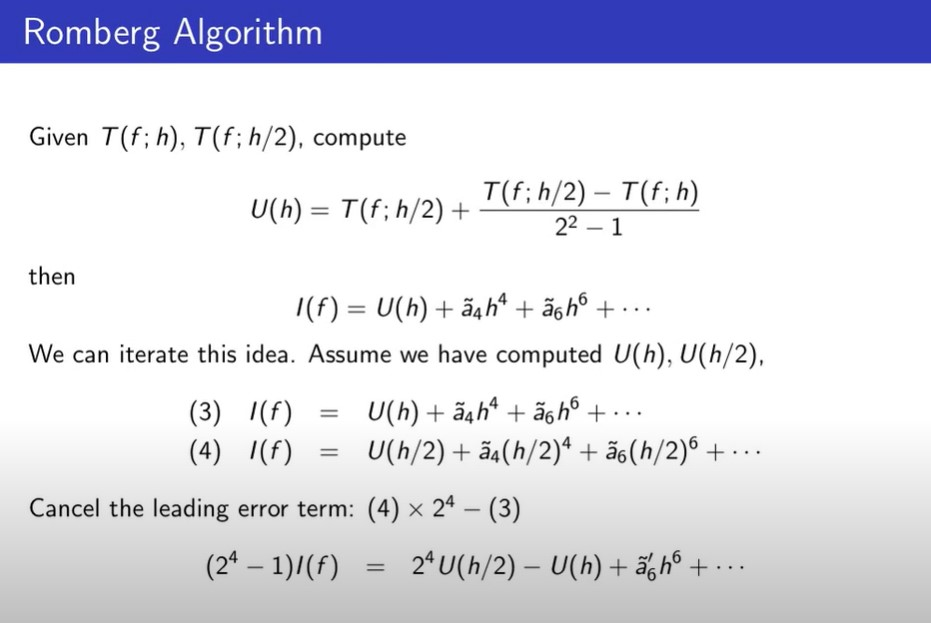

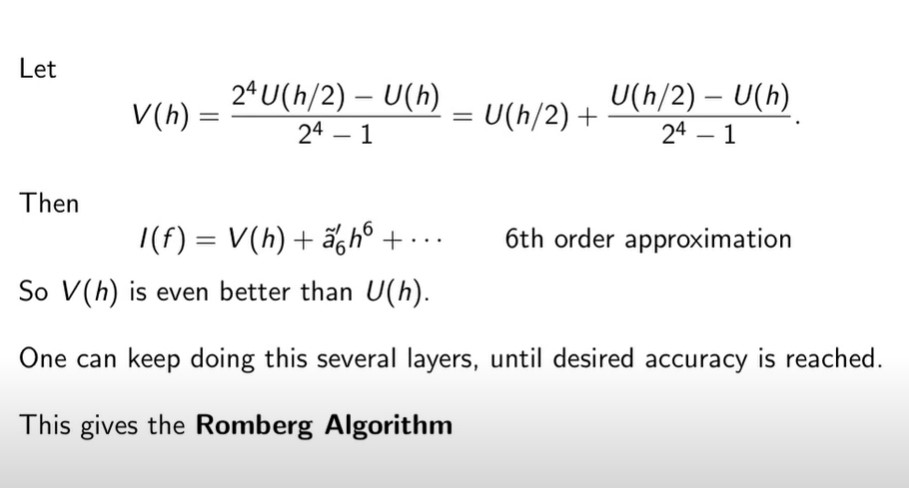

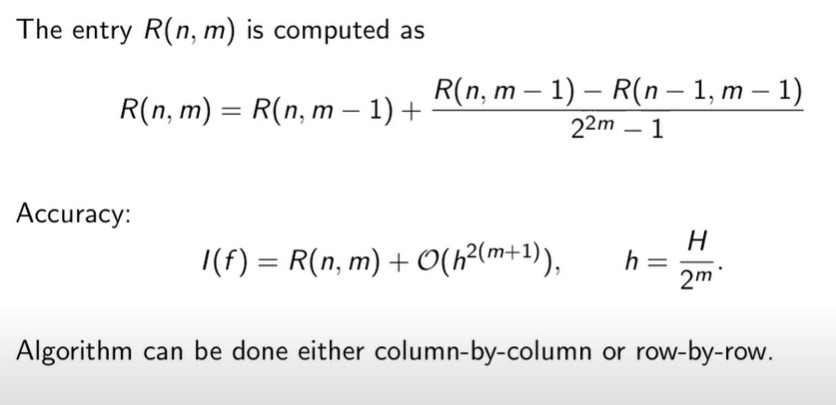

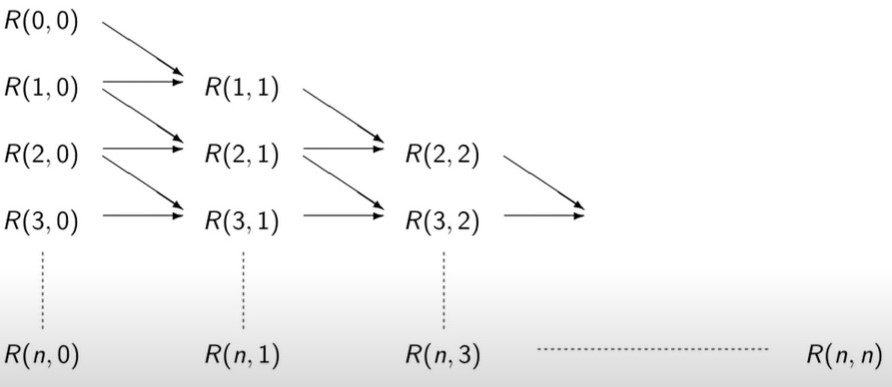

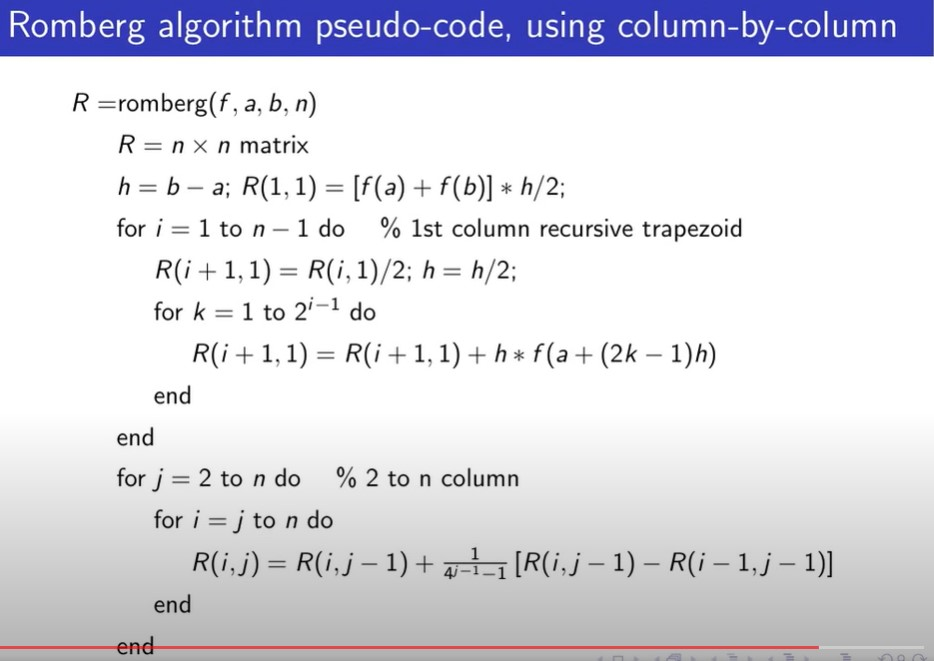

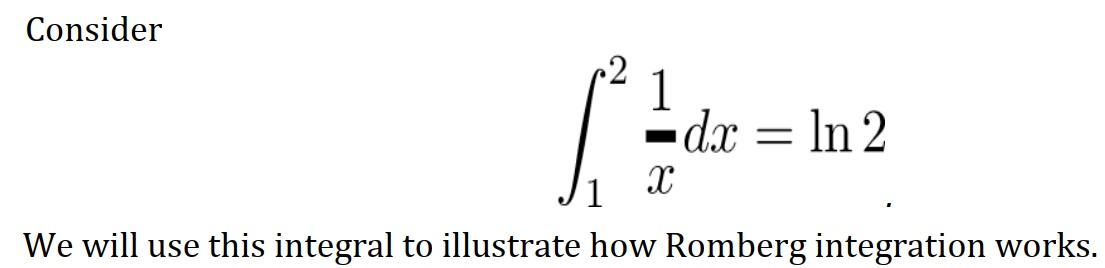

In [2]:
import numpy as np

def function(x):
    return (np.tan(x)+1/np.tan(x))**2

a = np.pi/4
b = np.pi/3
H = b - a 

def h_val(n):
    return H/(2**n)

def romberg(n,m):
    
    if m == 0 and n == 0:
        return h_val(n)/2*(function(a)+function(b))
    elif n != 0 and m == 0:
        h = h_val(n)
        xi = np.linspace(a,b,2**n+1,endpoint=True)
        f = function(xi)
        return h*(f[0]/2 + np.sum(f[1:-1]) + f[-1]/2)
    else:
        return romberg(n,m-1) + (romberg(n,m-1)-romberg(n-1,m-1))/(2**(2*m)-1)
    
    
romberg(11,11)

1.1547005383792512

### Closed Newton-Cotes Formula

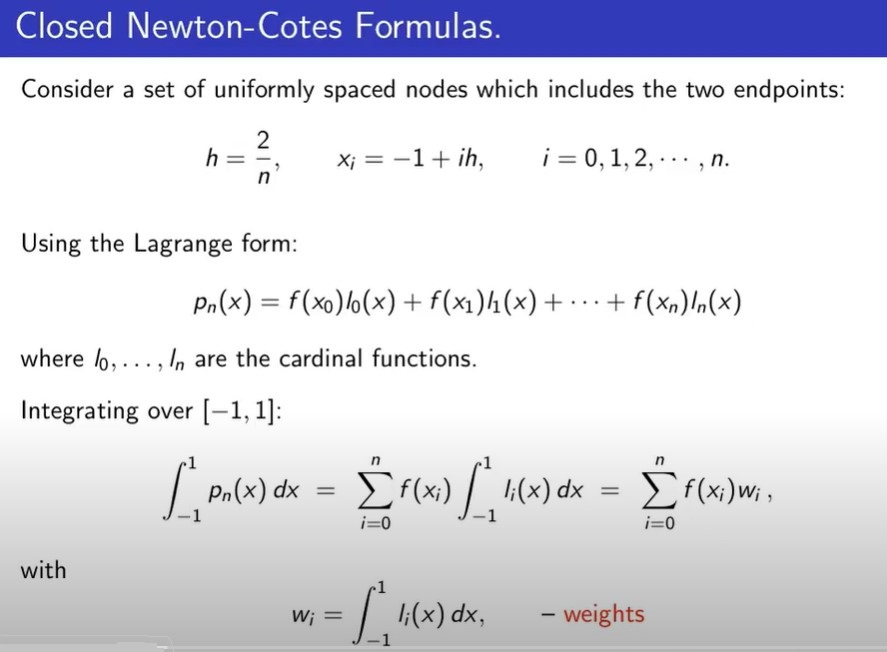

for n = 1,

$h = \frac{2}{n} = 2$

$x_{i} = -1 + 2i, \quad i = 0,1$

$[x_{0},x_{1}] = [-1,1]$

$p_{n}(x) = f(x_{0})l_{0}(x) + f(x_{1})l_{1}(x)$

$\large{l_{0}(x) = \frac{(x-x_{1})}{(x_{0}-x_{1})}, l_{1}(x) = \frac{(x-x_{0})}{(x_{1}-x_{0})}}$
 

for n = 2,

$h = \frac{2}{2} = 1$

$x_{i} = -1 + i, \quad i = 0,1,2$

$[x_{0},x_{1},x_{2}] = [-1,0,1]$

$p_{n}(x) = f(x_{0})l_{0}(x) + f(x_{1})l_{1}(x) + f(x_{2})l_{2}(x)$

$\large{l_{0}(x) = \frac{(x-x_{1})(x-x_{2})}{(x_{0}-x_{1})(x_{0}-x_{2})}, l_{1}(x) = \frac{(x-x_{0})(x-x_{2})}{(x_{1}-x_{0})(x_{1}-x_{2})}, l_{2}(x) = \frac{(x-x_{0})(x-x_{1})}{(x_{2}-x_{0})(x_{2}-x_{1})}}$


for n = 3,

$h = \frac{2}{3}$

$x_{i} = -1 + \frac{2}{3}i, \quad i = 0,1,2,3$

$[x_{0},x_{1},x_{2},x_{3}] = [-1,-\frac{1}{3},\frac{1}{3},1]$

$p_{n}(x) = f(x_{0})l_{0}(x) + f(x_{1})l_{1}(x) + f(x_{2})l_{2}(x) + f(x_{3})l_{3}(x)$

$\large{l_{0}(x) = \frac{(x-x_{1})(x-x_{2})(x-x_{3})}{(x_{0}-x_{1})(x_{0}-x_{2})(x_{0}-x_{3})}, l_{1}(x) = \frac{(x-x_{0})(x-x_{2})(x-x_{3})}{(x_{1}-x_{0})(x_{1}-x_{2})(x_{1}-x_{3})}, l_{2}(x) = \frac{(x-x_{0})(x-x_{1})(x-x_{3})}{(x_{2}-x_{0})(x_{2}-x_{1})(x_{2}-x_{3})}}$

$\large{l_{3}(x) = \frac{(x-x_{0})(x-x_{1})(x-x_{2})}{(x_{3}-x_{0})(x_{3}-x_{1})(x_{3}-x_{2})}}$

for n = 4,

$h = \frac{2}{4} = \frac{1}{2}$

$x_{i} = -1 + \frac{1}{2}i, \quad i = 0,1,2,3,4$

$[x_{0},x_{1},x_{2},x_{3},x_{4}] = [-1,-\frac{1}{2},0,\frac{1}{2},1]$

$p_{n}(x) = f(x_{0})l_{0}(x) + f(x_{1})l_{1}(x) + f(x_{2})l_{2}(x) + f(x_{3})l_{3}(x) + f(x_{4})l_{4}(x)$

$\large{l_{0}(x) = \frac{(x-x_{1})(x-x_{2})(x-x_{3})(x-x_{4})}{(x_{0}-x_{1})(x_{0}-x_{2})(x_{0}-x_{3})(x_{0}-x_{4})}, l_{1}(x) = \frac{(x-x_{0})(x-x_{2})(x-x_{3})(x-x_{4})}{(x_{1}-x_{0})(x_{1}-x_{2})(x_{1}-x_{3})(x_{1}-x_{4})}, l_{2}(x) = \frac{(x-x_{0})(x-x_{1})(x-x_{3})(x-x_{4})}{(x_{2}-x_{0})(x_{2}-x_{1})(x_{2}-x_{3})(x-x_{4})}}$

$\large{l_{3}(x) = \frac{(x-x_{0})(x-x_{1})(x-x_{2})(x-x_{4})}{(x_{3}-x_{0})(x_{3}-x_{1})(x_{3}-x_{2})(x_{3}-x_{4})}, l_{4}(x) = \frac{(x-x_{0})(x-x_{1})(x-x_{2})(x-x_{3})}{(x_{4}-x_{0})(x_{4}-x_{1})(x_{4}-x_{2})(x_{4}-x_{3})}}$

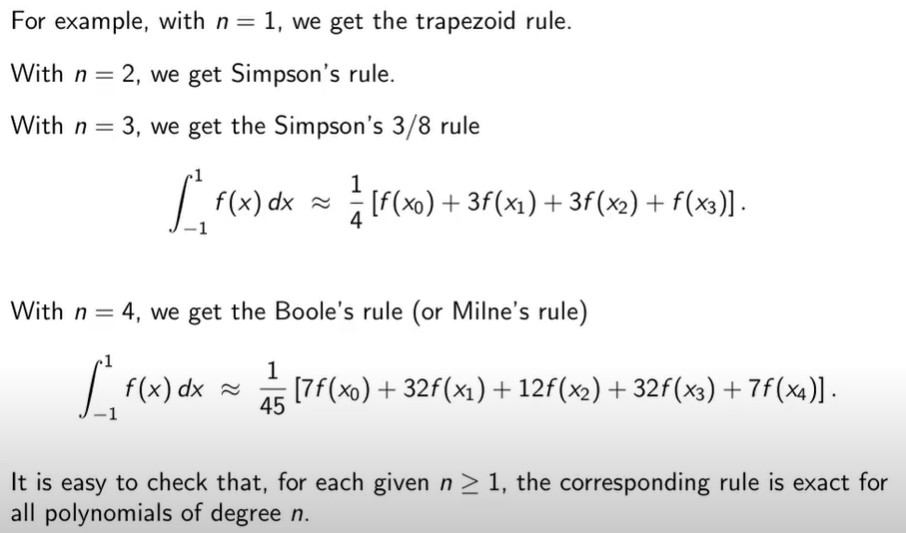

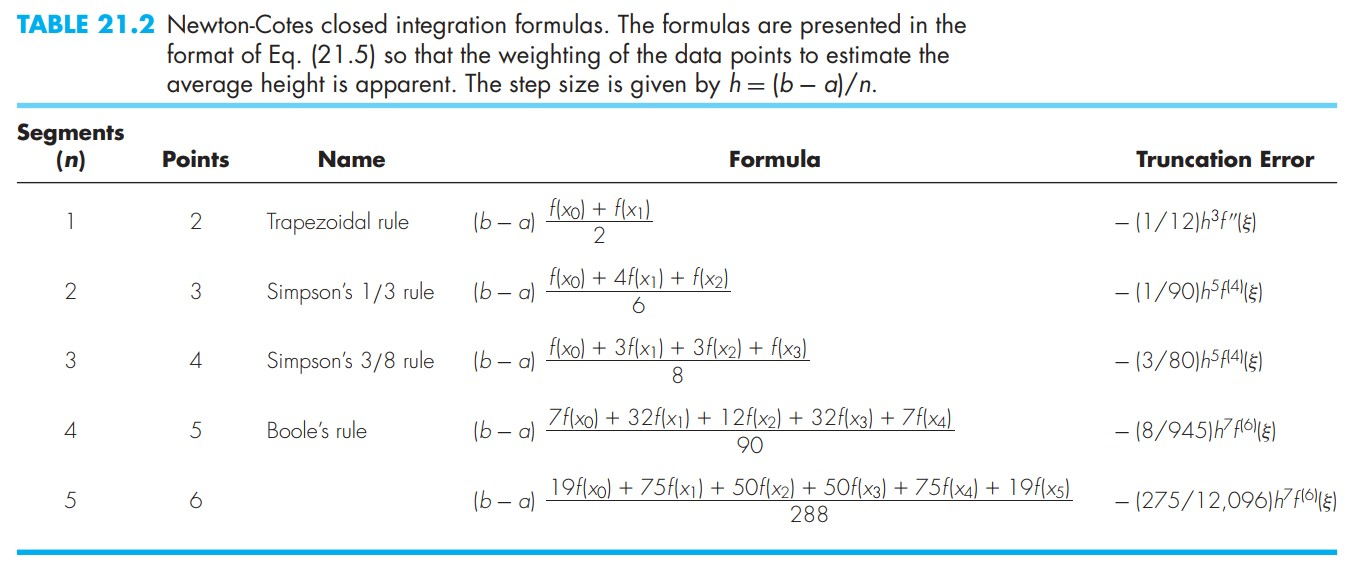

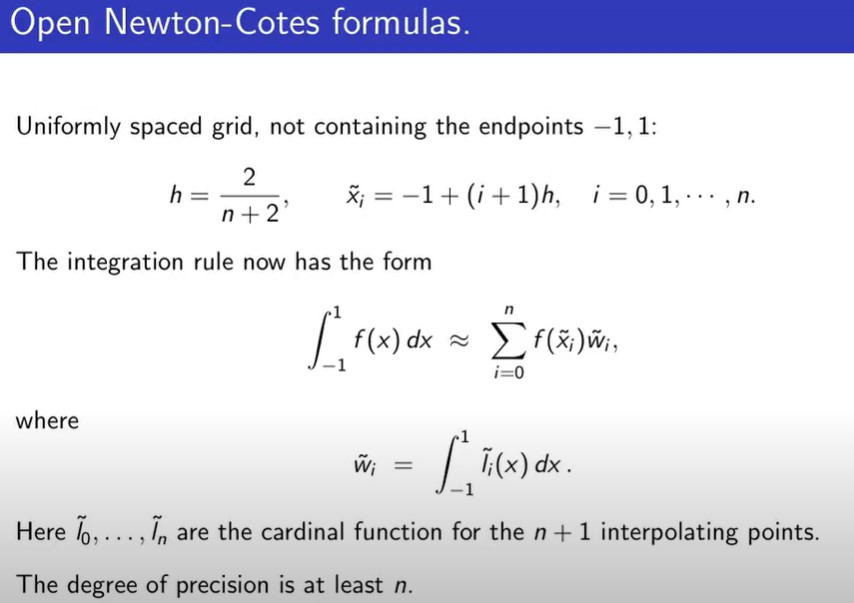

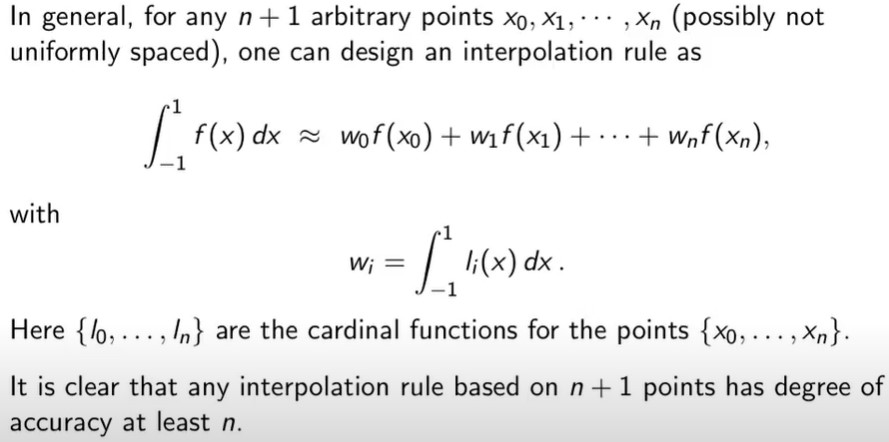

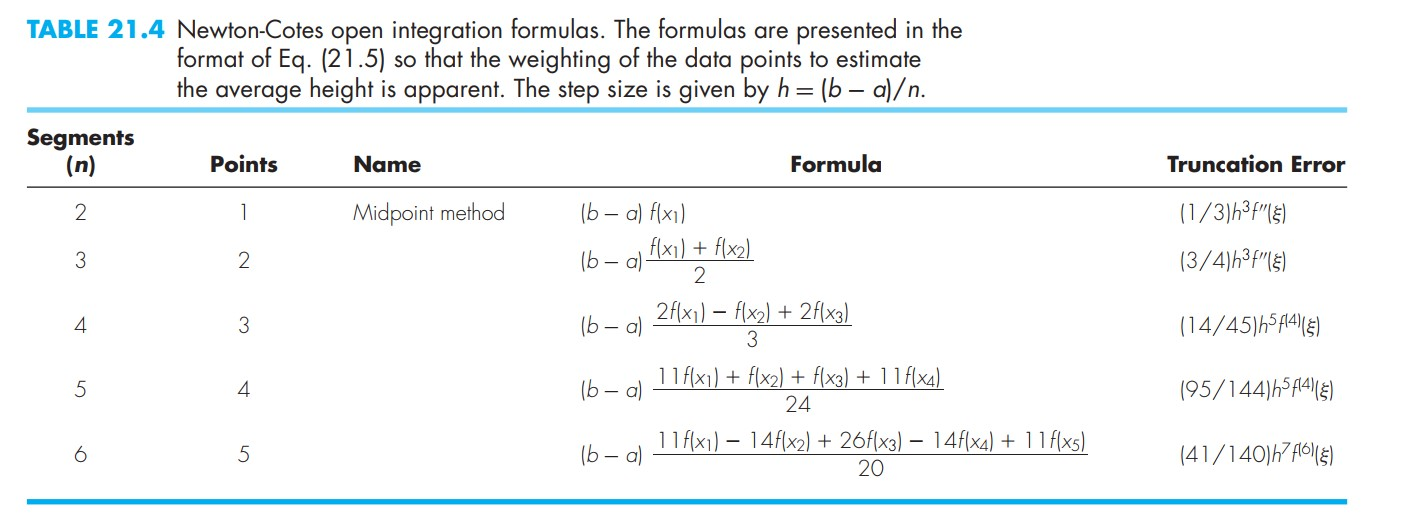

### Gaussian Quadrature

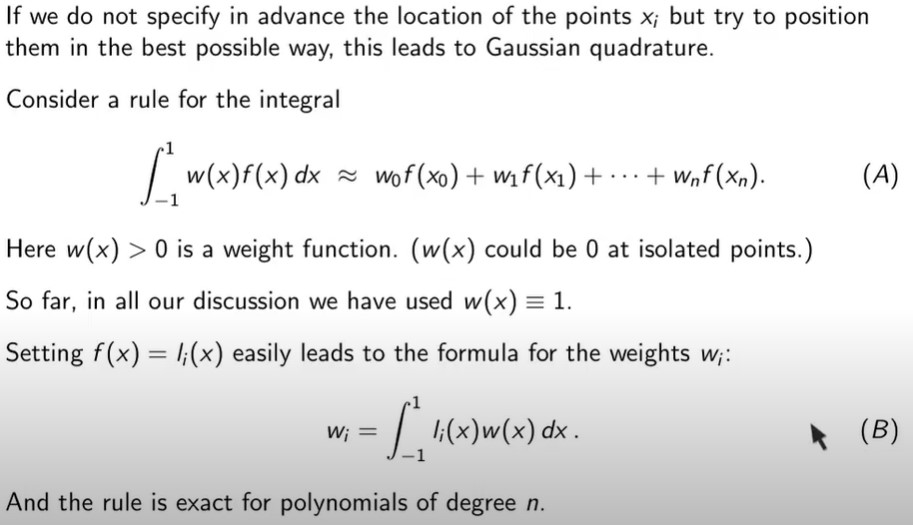

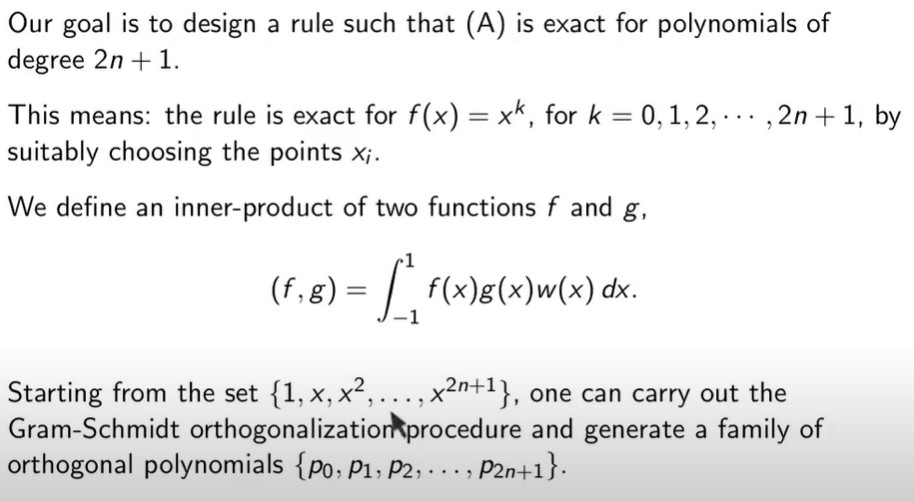

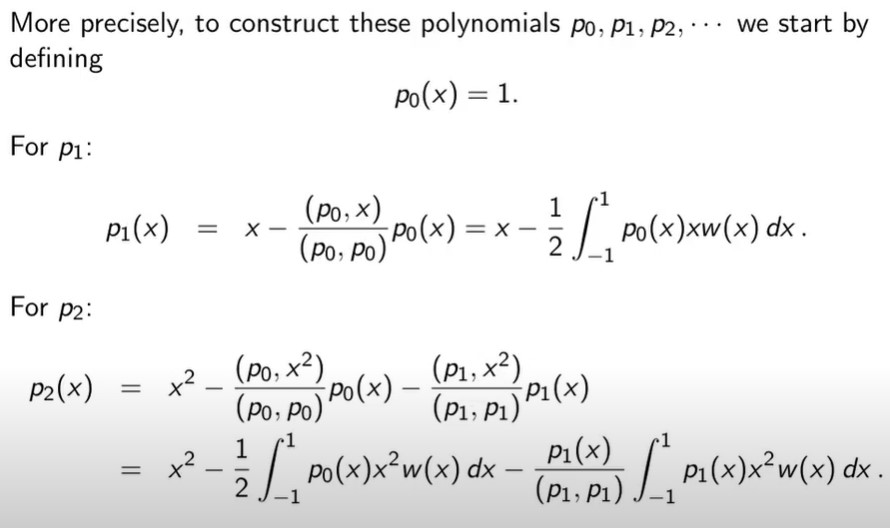

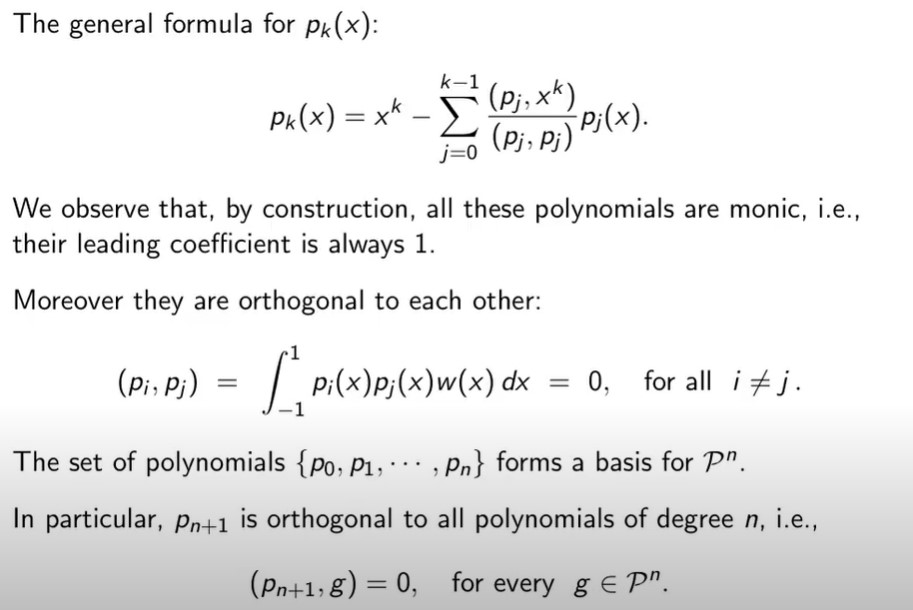

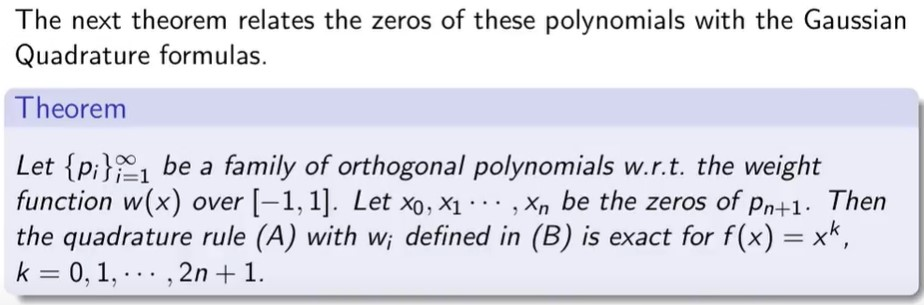

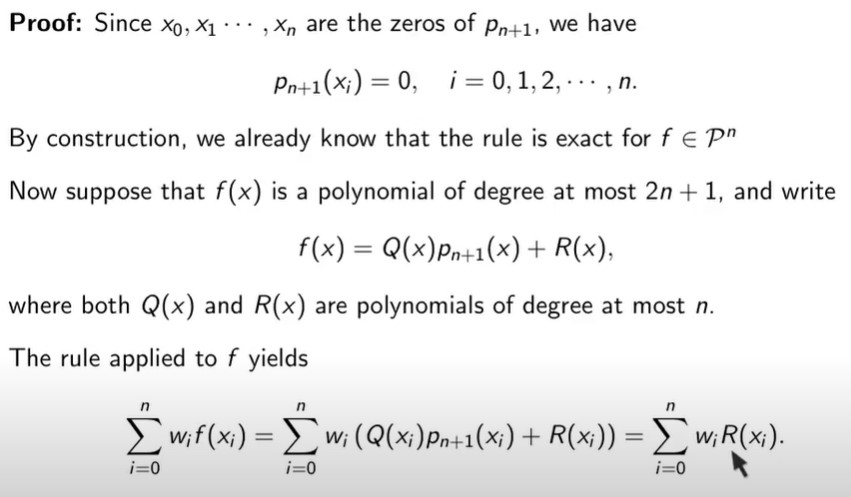

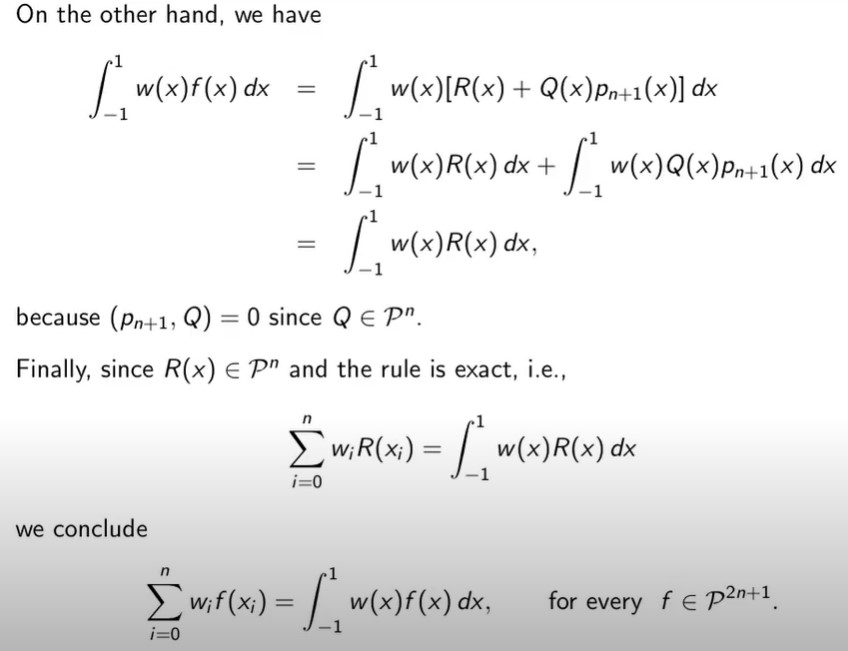

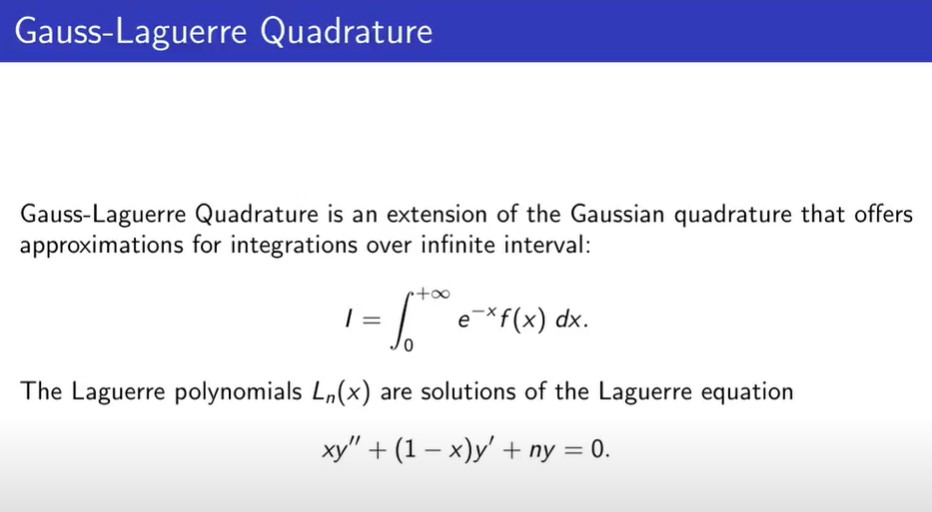

This problem is also known as Eigen Value Problem where n serves as an Eigen Value.

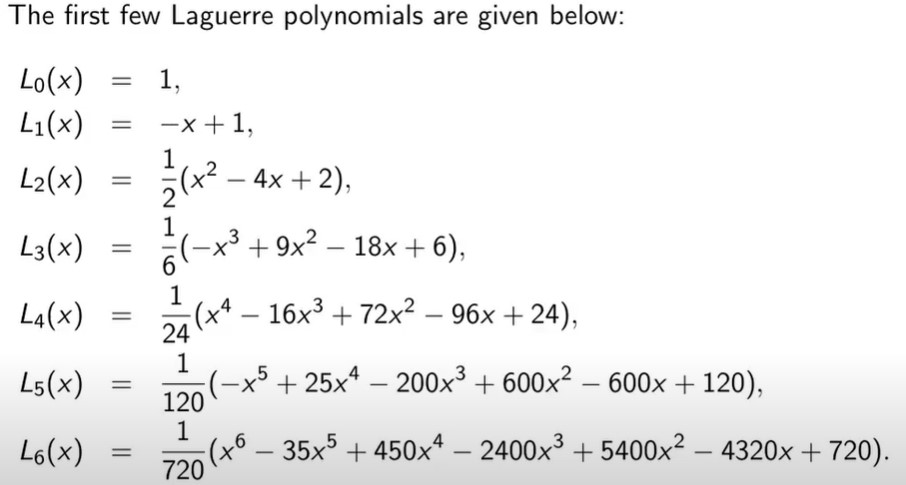

These Polynomials are orthogonal to each other with respect to the weight function $e^{-x}$ on the interval from $0$ to $\infty$

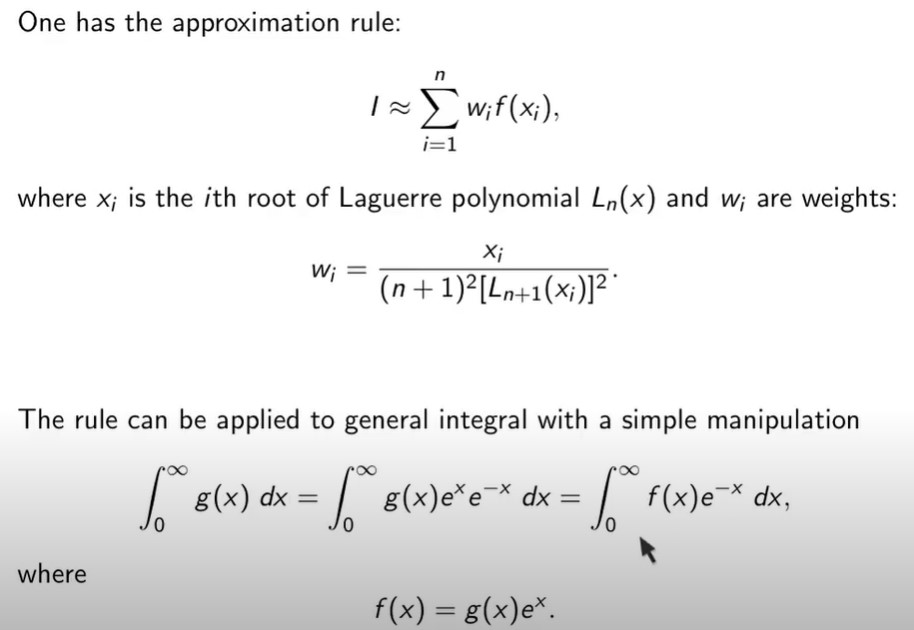

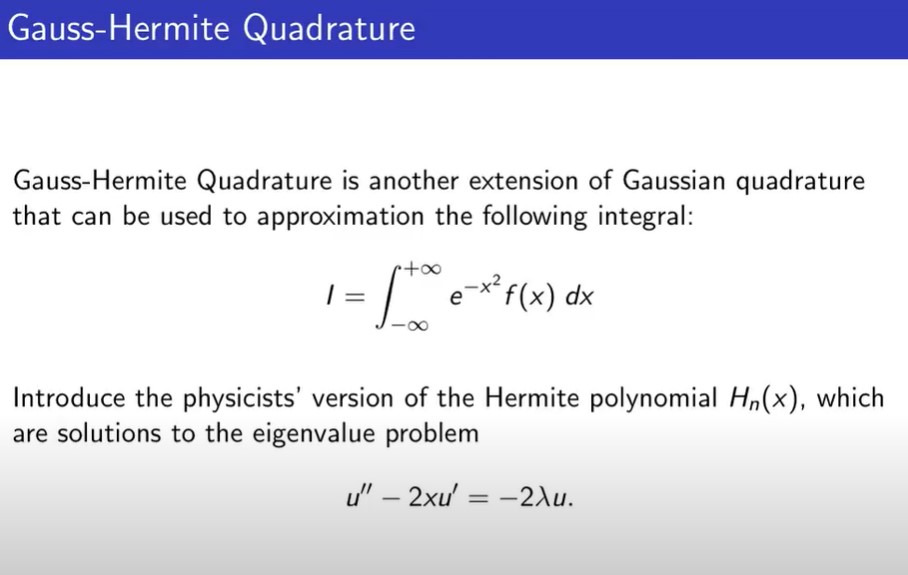

$\lambda$ is an eigen value

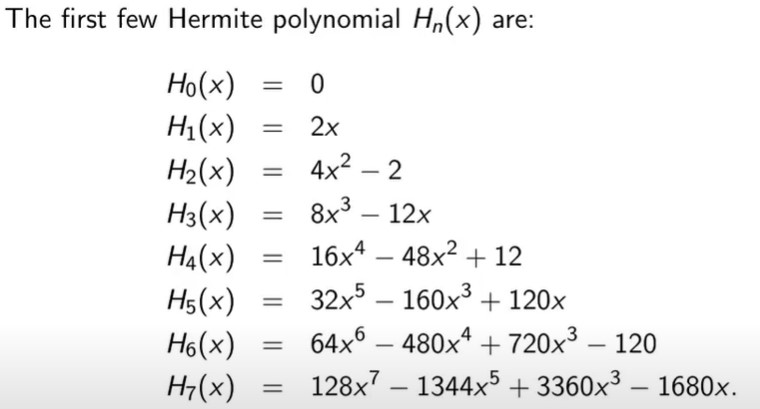

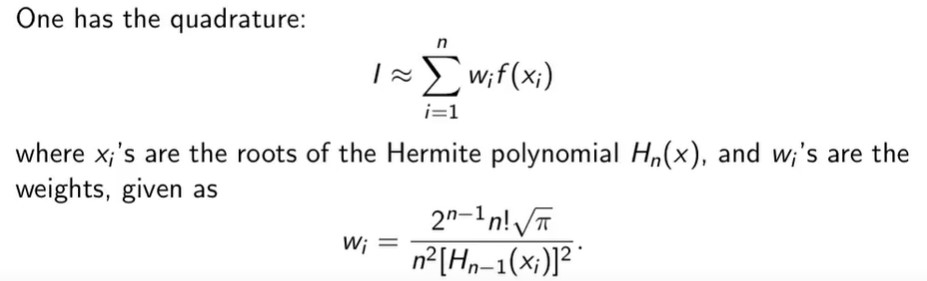

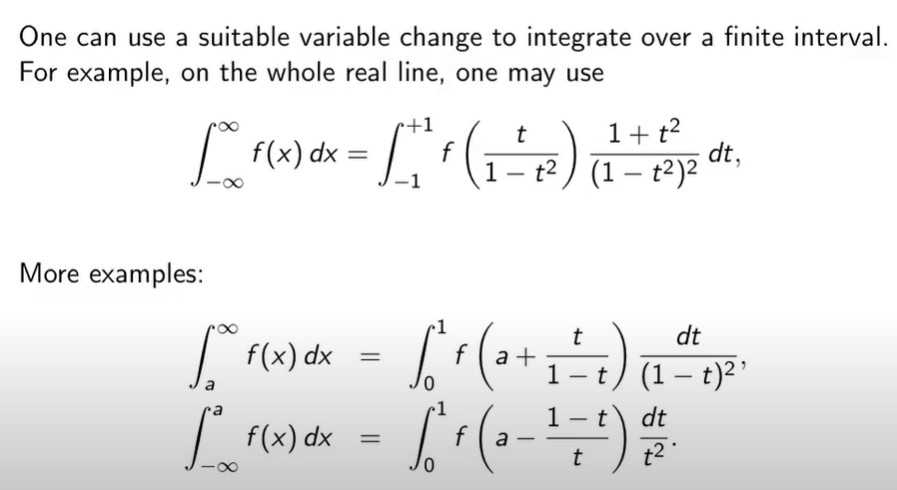

### Aitken-Neville Interpolation

A set of data points $(x_{k},y_{k}),\quad$ k=0,1,2,.....,n where $x_{k}$'s are distinct

Let, $p_{i,j}(x)$ with $i \leq j$ be a polynomial of degree j-i that interpolates the point $(x_{k},y_{k})$ for k = i,....,j

The polynomials $p_{i,j}$ can be computed with recursion:


$\begin{align}
p_{i,i}(x) &= y_{i}; 0 \leq i \leq n\\
p_{i,j}(x) &= \frac{(x-x_{j})p_{i,j-1}(x)-(x-x_{i})p_{i+1,j}(x)}{x_{i}-x_{j}}, 0 \leq i \leq j \leq n\\
\end{align}$

Given i,j with $i < j$, a polynomial $p_{i,j-1}(x)$ that interpolates through the points with indices k = i,......,j-1, another $p_{i+1,j}(x)$ that interpolates through the points with indices k = i+1,......,j.

This means

$$p_{i,j-1}(x_{k}) = y_{k},\quad i \leq k \leq j-1$$

$$p_{i+1,j}(x_{k}) = y_{k},\quad i-1 \leq k \leq j$$

Then, for $i+1 \leq k \leq j-1 $ we have 

$\begin{align}
p_{i,j}(x_{k}) &= \frac{(x-x_{j})p_{i,j-1}(x)-(x-x_{i})p_{i+1,j}(x)}{x_{i}-x_{j}}\\
&= \frac{(x-x_{j})y_{k}-(x-x_{i})y_{k}}{x_{i}-x_{j}} = y_{k}\\
\end{align}$

and 

$$p_{i,j}(x_{i}) = \frac{(x_{i}-x_{j})p_{i,j-1}(x)}{x_{i}-x_{j}} = y_{i}$$

$$p_{i,j}(x_{j}) = \frac{-(x_{j}-x_{i})p_{i+1,j}(x)}{x_{i}-x_{j}}=y_{j}$$

$\therefore p_{i.j}$ interpolates the points with indices k=i,...,j, completing the induction proof